In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
import numpy as np

In [10]:
import igraph as ig

In [11]:
from collections import defaultdict

In [12]:
from pathlib import Path
import subprocess

In [13]:
import plotly_plotting as pp

In [14]:
import re
import os

In [15]:
# from importlib import reload
# reload(pp)

In [16]:
workdir = Path("../")
input_path = workdir  / "input" 
matrix_path = input_path / "DECIPHER_noCre_Ape_DistanceMatrix"
output_path = workdir / "output"
intermediate_path = workdir / "intermediate"

In [ ]:
code_test_cases =['SAGT',
             'PR5',
             'HSP',
             'CBP60G',
             'CO',
             'bHLH',
             'AGO',
             'ACS',
             '4CLL', 
             'NINIM', 
             'CYP71B', 
             'LRR-BAK1'
            ] 

for i in range(len(code_test_cases)):
    print(f"python cm_clusters.py {i} > print-log-{code_test_cases[i]}.txt")
print()
for i in range(len(code_test_cases)):
    print(f"python make_graphs.py.py {i} > print-log-{code_test_cases[i]}.txt")


In [1]:
test_cases =[#'SAGT',
             'PR5',
             #'HSP',
             #'CBP60G',
             'CO',
             'bHLH',
             'AGO',
             'ACS',
             '4CLL'
            ]

example_cases = [
    '4CLL', 
    'CO', 
    'bHlH'
]

python cm_clusters.py 0 > print-log-SAGT.txt
python cm_clusters.py 1 > print-log-PR5.txt
python cm_clusters.py 2 > print-log-HSP.txt
python cm_clusters.py 3 > print-log-CBP60G.txt
python cm_clusters.py 4 > print-log-CO.txt
python cm_clusters.py 5 > print-log-bHLH.txt
python cm_clusters.py 6 > print-log-AGO.txt
python cm_clusters.py 7 > print-log-ACS.txt
python cm_clusters.py 8 > print-log-4CLL.txt
python cm_clusters.py 9 > print-log-NINIM.txt
python cm_clusters.py 10 > print-log-CYP71B.txt
python cm_clusters.py 11 > print-log-LRR-BAK1.txt


In [19]:
def matrix_to_long(df, k=-1):
    """
    Symmetric dataframe to long (.ncol) format.
    
    df -- square, symentric dataframe
    k -- number lines off diagonal. Default of -1 loses diagonal entries.  
    """
    
    new_df = df.where(np.tril(np.ones(df.shape), k=k).astype(np.bool))
    new_df = new_df.stack().reset_index()
    new_df.columns = ['Row','Column','Value']
    return new_df

def read_in_matrix_to_graph(file, transform=lambda x: x, param=None):
    df = pd.read_csv(file, sep="\t", header=0, index_col=0)
    x = matrix_to_long(df)
    if param:
        x['Value'] = transform(x["Value"], param)
    else:
        x['Value'] = transform(x["Value"])
    g = ig.Graph.TupleList(x.values, weights=True)
    return g
    

In [20]:
def plot_comparison_transforms(a=1):    
    x = np.linspace(0.00, 0.99, num=100)
    # Supply the limits
    wbound = -0.1
    ebound = 1.1
    sbound = -0.1
    nbound = 2.1
    ncols = 3
    fig, axs  = plt.subplots(ncols=ncols, nrows=int(np.ceil(len(transforms)/ncols)), 
                             figsize=(ncols*4, np.ceil(len(transforms)/ncols)*4), 
                            #sharex=True, #sharey=True
                            )
    plt.xlim(wbound, ebound)
    #plt.ylim(sbound, nbound)

    # Set common labels
    fig.text(0.5, 0.07, 'Distance', ha='center', va='center', fontsize=14)
    fig.text(0.07, 0.5, 'Similarity', ha='center', va='center', rotation='vertical', fontsize=14)

    for ax, (name, f) in zip(axs.flatten(), transforms.items()):
        if name in has_param:
            for a in [0.2, 0.5, 0.8, 1, 3, 5]:
                y = f(x, a)
                ax.plot(x, y, label=f"a={a}")
                ax.legend()
        else:
            y = f(x)
            ax.plot(x, y)            
        ax.set_title(name)             
    plt.suptitle('Comparison of transforms', y = 0.95, fontsize=16)
    #plt.subplots_adjust(wspace=0.05)
    plt.show()

In [21]:
transforms = {
    "1-x": lambda x: 1-x,
    "-log(x)": lambda x: np.array([-np.log(z) if not z == 0 else -np.log(x[x>0].min()) for z in x]),
    "sqrt(1-x)": lambda x: np.sqrt(1-x), 
    "(1/x)-1": lambda x: np.array([(1/z)-1 if not z == 0 else (1/x[x>0].min())-1 for z in x]),
    "1/(x+a)": lambda x, a=1: 1/(x+a), 
    "e^(- x^a)": lambda x, a=1: np.exp(-x**a),
    "e^(-a*x)": lambda x, a=1:np.exp(-a*x),
}

has_param = ["e^(- x^a)", "e^(-a*x)", "1/(x+a)"]
# class Transforms:

#     def __init__(self):
#         self.
        
#         for key, value in transforms_wo_params.items():
#             self[key] = value
        
#         for key, value in transforms_w_params.items():
#             self[key] = _w_param(value)
        
#     def _w_param(func, a=1):
#         return lambda x: func(x, a)

In [27]:
def plot_historgram_transforms(x):
    # Supply the limits
    wbound = -0.1
    ebound = 10.1
    sbound = -0.1
    nbound = 2.1

    ncols = 3
    fig, axs  = plt.subplots(ncols=ncols, nrows=int(np.ceil(len(transforms)/ncols)), 
                             figsize=(ncols*4, np.ceil(len(transforms)/ncols)*4), 
                            #sharex=True, 
                             sharey=True
                            )

    for ax, (name, f) in zip(axs.flatten(), transforms.items()):
        print(name)
        
        if name in has_param:
            for a in [0.2, 0.5, 0.8, 1, 3, 5]:
                y = f(x, a)
                ax.hist(y, bins=20, label=f"a={a}")
                ax.legend()
        else:
            y = f(x)
            ax.hist(y, bins=20)
        ax.set_title(name)
    
    plt.suptitle('Comparison of transforms', y = 0.95, fontsize=16)
    #plt.subplots_adjust(wspace=0.05)
    plt.show()            



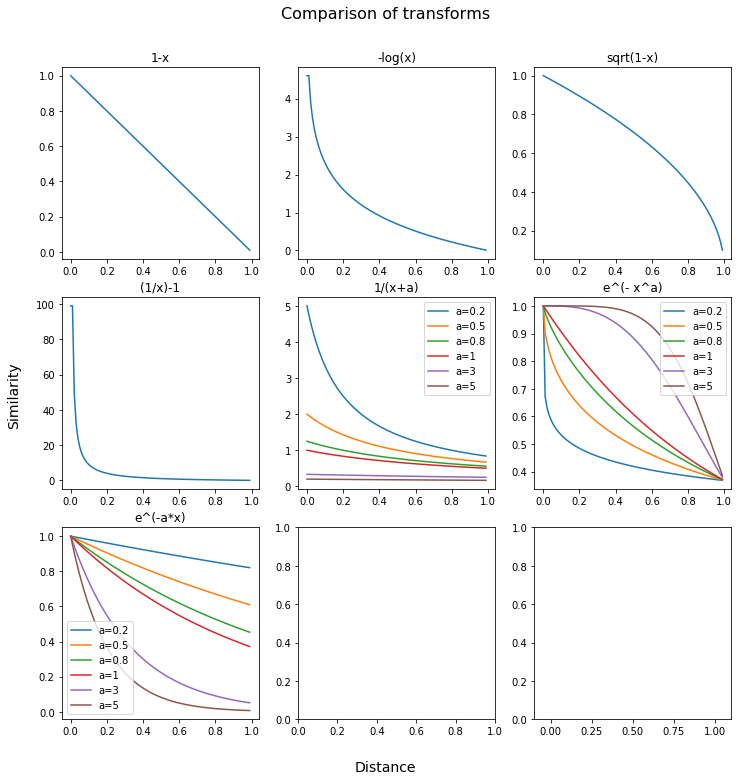

In [17]:
plot_comparison_transforms()

In [22]:
# test case
gene = "SAGT"
file = matrix_path / f"{gene}_Ape_DistanceMatrix.txt" 
g = read_in_matrix_to_graph(file)

In [25]:
g.es()

In [30]:
g.vcount()

153

In [37]:
g.get_adjacency(attribute='weight')

Matrix([[0, 0.685860761688315, 0.39202577788496995, 0.38469669005644, 0.377562169038904, 0.536321218523193, 0.548971641356545, 0.5396261560208611, 0.560784841101335, 0.562595557632559, 0.5740828390527, 0.560032466591325, 0.55048188256318, 0.5539117094069971, 0.555959449142569, 0.565194165260439, 0.5631426370198139, 0.555189421835149, 0.5742039227726821, 0.700649049745371, 0.55048188256318, 0.463714691637092, 0.472633098638911, 0.4696682183138621, 0.5438802621113851, 0.5507237994645799, 0.550542773209079, 0.557290487290668, 0.539888711335774, 0.549984608855036, 0.5514109665703559, 0.55344946138406, 0.547928584428949, 0.555328751890029, 0.5596419436974089, 0.564890364226109, 0.5613096232478871, 0.5548559890091529, 0.54232614454664, 0.581489033776973, 0.524832451165519, 0.564870735096465, 0.558250692446, 0.5535187248173311, 0.5595813731096779, 0.5547001962252289, 0.505780538858873, 0.555959449142569, 0.651191702121113, 0.4835498519182771, 0.49210892084895497, 0.49093258106825, 0.576071529

In [28]:
g.edge_attributes()

['weight']

1-x
-log(x)
sqrt(1-x)
(1/x)-1
1/(x+a)
e^(- x^a)
e^(-a*x)


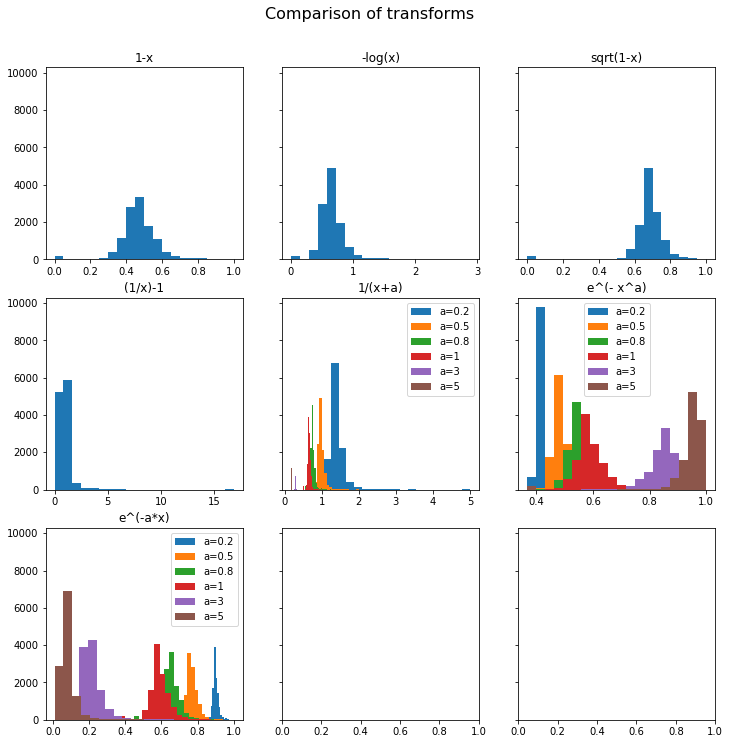

In [29]:
plot_historgram_transforms(np.array(g.es()['weight']))

In [65]:
def matrix_to_long(df, k=-1):
    """
    Symmetric dataframe to long (.ncol) format.
    
    df -- square, symentric dataframe
    k -- number lines off diagonal. Default of -1 loses diagonal entries.  
    """
    
    new_df = df.where(np.tril(np.ones(df.shape), k=k).astype(np.bool))
    new_df = new_df.stack().reset_index()
    new_df.columns = ['Row','Column','Value']
    return new_df

def read_in_matrix_to_graph(file, transform=lambda x: x, param=None):
    df = pd.read_csv(file, sep="\t", header=0, index_col=0)
    x = matrix_to_long(df)
    if param:
        x['Value'] = transform(x["Value"], param)
    else:
        x['Value'] = transform(x["Value"])
    g = ig.Graph.TupleList(x.values, weights=True)
    return g
    

In [45]:
def write_igraph(g, f):
    with open(f, "w") as out:
        for e in g.es():
            out.write(f"{g.vs()[e.source]['name']}\t{g.vs()[e.target]['name']}\t{e['weight']}\n")

def read_graph(f):
    df = pd.read_csv(f, sep="\s+", header=None, index_col=None)
    g = ig.Graph.TupleList(df.values, weights=True)
    return g

def one_cc_cut_off(g):
    """ Highest threshold s.t. g is connected. """    
    weights = np.array(g.es()['weight'])
    prev_t = weights.min()
    for t in np.linspace(weights.min(), weights.max(), 500):
        selector = g.es.select(lambda x:x['weight']>= t)
        this_g = g.subgraph_edges(selector)
        if not this_g.is_connected():
            return prev_t
        else:
            pre_t = t
            
def whole_graph_cut_off(g):
    """ Highest threshold s.t. each vertex has at least one edge. """
    wg_min = 100
    for v in g.vs():
        max_v = 0
        for e in g.incident(v):
            max_v = max(max_v, g.es()[e]['weight'])
        wg_min = min(wg_min, max_v)
    return wg_min

def read_clusters(file):
    ''' List of lists '''
    clusters = []
    with open(file, 'r') as f:
        for line in f:
            clusters.append(line.strip().split())
    return sorted(clusters, key=len, reverse=True)

def maxmal_cliques(g):
    clusters = []
    for c in g.maximal_cliques()[::-1]:
        this_cluster  = []
        for v in c:
            this_cluster.append(g.vs()[v]['name'])
        clusters.append(this_cluster)
    return sorted(clusters, key=len, reverse=True)


def write_el_format(g, file):
    with open(file, "w") as out:
        out.write(f"{g.vcount()}\t{g.ecount()}\n")
        for e in g.es():
            out.write(f"{g.vs()[e.source]['name']}\t{g.vs()[e.target]['name']}\n")
    

In [ ]:
graphs_per_gene = {}
for gene in test_cases:
    
    graphs = {}
    trans_files = transforms_per_gene[gene]
    
    for trans, file in trans_files.items():

        s = f"{gene:5}\t{trans:10}\t"
        g = read_graph(file)

        ##
        #s += f"{'none':5}\t"
        #new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-0.tsv"
        #write_igraph(g, new_file)
        #graphs[f"{trans}-0"] = new_file        
        
        
        t = whole_graph_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-wg.tsv"
        #write_igraph(this_g, new_file)
        graphs[f"{trans}-wg"] = new_file
        
        #new_file = intermediate_path / "el-graphs" / f"{gene}-{trans}-wg.tsv"
        #write_el_format(this_g, new_file)

        
        ## 
        t = one_cc_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-onecc.tsv"
        #write_igraph(this_g, new_file) 
        graphs[f"{trans}-onecc"] = new_file

        ## 
        t = 0.5
        s += f"{round(t, 3):5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-05.tsv"
        #write_igraph(this_g, new_file)
        graphs[f"{trans}-05"] = new_file

        ## 
        print(s)
    graphs_per_gene[gene] = graphs

In [41]:
g.vcount()

153

In [142]:
def files_per_gene(gene):
    
    trans_files = {}
    for name, f in transforms.items():
        name_clean = re.sub("[\s|\(|\)|\^|\/\*|-]", "", name)

        if name in has_param:
            for a in [0.2, 0.5, 0.8, 1, 3, 5]:
                g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
                trans_files[f"{name_clean}-{a}"] = g_file
        else:
            a="nan"
            g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
            trans_files[f"{name_clean}-{a}"] = g_file


    graphs = {}
    for trans, file in trans_files.items():
        s = f"{gene:5}\t{trans:10}\t"

        g = read_graph(file)
        for t in np.arange(0.1, 1, 0.1):
            s += f"{round(t, 3):<5}\t"
            new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-{t:0.3}.tsv"
            #selector = g.es.select(lambda x:x['weight']>= t)
            #this_g = g.subgraph_edges(selector)
            #write_igraph(this_g, new_file
            if os.path.exists(new_file):
                graphs[f"{trans}-{t:0.3}"] = new_file        

        t = whole_graph_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-wg.tsv"
#         selector = g.es.select(lambda x:x['weight']>= t)
#         this_g = g.subgraph_edges(selector)
#         write_igraph(this_g, new_file)
        if os.path.exists(new_file):
            graphs[f"{trans}-wg"] = new_file

        t = one_cc_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-oneccc.tsv"
#         selector = g.es.select(lambda x:x['weight']>= t)
#         this_g = g.subgraph_edges(selector)
#         write_igraph(this_g, new_file)
        if os.path.exists(new_file):
            graphs[f"{trans}-wg"] = new_file
    
    print(s)
    return trans_files, graphs

In [143]:
trans_per_gene  = {}
graphs_per_gene = {}
for gene in test_cases:
    trans_per_gene[gene], graphs_per_gene[gene] = files_per_gene(gene)

PR5  	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.103	0.048	
CO   	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.037	0.007	
bHLH 	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.035	0.026	
AGO  	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.033	0.007	
ACS  	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.105	0.007	
4CLL 	eax-5     	0.1  	0.2  	0.3  	0.4  	0.5  	0.6  	0.7  	0.8  	0.9  	0.124	0.056	


In [69]:
!ls

4CLL-0.log   AGO-0.log	  cm_clusters.py       PR5-0.log
4CLL-10.log  AGO-1.log	  cm_clusters_run2.py  PR5-10.log
4CLL-1.log   AGO-2.log	  cm_clusters_run3.py  PR5-11.log
4CLL-2.log   AGO-3.log	  cm_clusters_run4.py  PR5-12.log
4CLL-3.log   AGO-4.log	  cm_runs.txt	       PR5-1.log
4CLL-4.log   AGO-5.log	  CO-0.log	       PR5-2.log
4CLL-5.log   AGO-6.log	  CO-10.log	       PR5-3.log
4CLL-6.log   AGO-7.log	  CO-1.log	       PR5-4.log
4CLL-7.log   bHLH-0.log   CO-2.log	       PR5-5.log
4CLL-8.log   bHLH-10.log  CO-3.log	       PR5-6.log
4CLL-9.log   bHLH-1.log   CO-4.log	       PR5-7.log
ACS-0.log    bHLH-2.log   CO-5.log	       PR5-8.log
ACS-1.log    bHLH-3.log   CO-6.log	       PR5-9.log
ACS-2.log    bHLH-4.log   CO-7.log	       __pycache__
ACS-3.log    bHLH-5.log   CO-8.log	       test.tsv
ACS-4.log    bHLH-6.log   CO-9.log	       test_wg.tsv
ACS-5.log    bHLH-7.log   ete3.ipynb	       thresholding.ipynb
ACS-6.log    bHLH-8.log   out.mcl
ACS-7.log    bHLH-9.log   paraclique.R
ACS-8.log 

In [70]:
import glob

In [155]:
gene = '4CLL'
logs = []
for f in glob.glob(f"{gene}-*.log"):
    logs.append(pd.read_csv(f, sep='\t', header=None))

In [156]:
df = pd.concat(logs)
df.drop_duplicates(inplace=True)

In [157]:
df = df[~df[2].isin(['empty', 'already'])]

In [158]:
a = df[df[1].str.startswith('exa-0.5')].copy(); a

0                    1  2         3
121  4CLL          exa-0.5-0.1  2  0.000847
122  4CLL          exa-0.5-0.2  2  0.000847
123  4CLL          exa-0.5-0.3  2  0.000847
124  4CLL          exa-0.5-0.4  2  0.000847
125  4CLL          exa-0.5-0.5  4  0.472202
126  4CLL          exa-0.5-0.6  9  0.865289
127  4CLL          exa-0.5-0.7  3  0.666585
130  4CLL           exa-0.5-wg  7  0.706057
131  4CLL        exa-0.5-onecc  2  0.000847
130  4CLL     exa-0.5-wg-0.524  7  0.706057
131  4CLL  exa-0.5-onecc-0.468  2  0.000847

In [160]:
a['t'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, np.nan, np.nan, 0.524, 0.468]

In [161]:
a

0                    1  2         3      t
121  4CLL          exa-0.5-0.1  2  0.000847  0.100
122  4CLL          exa-0.5-0.2  2  0.000847  0.200
123  4CLL          exa-0.5-0.3  2  0.000847  0.300
124  4CLL          exa-0.5-0.4  2  0.000847  0.400
125  4CLL          exa-0.5-0.5  4  0.472202  0.500
126  4CLL          exa-0.5-0.6  9  0.865289  0.600
127  4CLL          exa-0.5-0.7  3  0.666585  0.700
130  4CLL           exa-0.5-wg  7  0.706057    NaN
131  4CLL        exa-0.5-onecc  2  0.000847    NaN
130  4CLL     exa-0.5-wg-0.524  7  0.706057  0.524
131  4CLL  exa-0.5-onecc-0.468  2  0.000847  0.468

(0, 1)

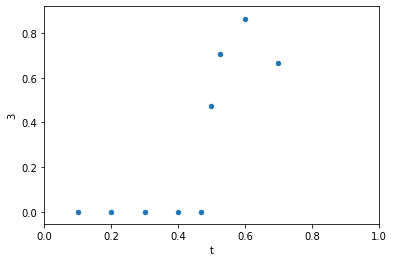

In [163]:
a.plot.scatter(x='t', y=3)
plt.xlim([0, 1])

In [2]:
import numpy as np

In [3]:
np.arange(0.05, )

0.05
0.1
0.15000000000000002
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000001
0.7500000000000001
0.8
0.8500000000000001
0.9000000000000001
0.9500000000000001


In [17]:
transforms_per_gene  = {}
for gene in test_cases:
    trans_files = {}
    file = matrix_path / f"{gene}_Ape_DistanceMatrix.txt" 
    g = read_in_matrix_to_graph(file)
    this_g = g.copy()
    
    for name, f in transforms.items():
        print(gene, name)
        name_clean = re.sub("[\s|\(|\)|\^|\/\*|-]", "", name)

        if name in has_param:
            for a in [0.2, 0.5, 0.8, 1, 3, 5]:
                #this_g.es()['weight'] = f(np.array(g.es()['weight']), a)
                g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
                
                trans_files[f"{name_clean}-{a}"] = g_file
                #write_igraph(this_g, g_file)
        else:
            a="nan"
            #this_g.es()['weight'] = f(np.array(g.es()['weight']))
            g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
            
            trans_files[f"{name_clean}-{a}"] = g_file
            #write_igraph(this_g, g_file)
    transforms_per_gene[gene] = trans_files


PR5 1-x
PR5 -log(x)
PR5 sqrt(1-x)
PR5 (1/x)-1
PR5 1/(x+a)
PR5 e^(- x^a)
PR5 e^(-a*x)
CO 1-x
CO -log(x)
CO sqrt(1-x)
CO (1/x)-1
CO 1/(x+a)
CO e^(- x^a)
CO e^(-a*x)
bHLH 1-x
bHLH -log(x)
bHLH sqrt(1-x)
bHLH (1/x)-1
bHLH 1/(x+a)
bHLH e^(- x^a)
bHLH e^(-a*x)
AGO 1-x
AGO -log(x)
AGO sqrt(1-x)
AGO (1/x)-1
AGO 1/(x+a)
AGO e^(- x^a)
AGO e^(-a*x)
ACS 1-x
ACS -log(x)
ACS sqrt(1-x)
ACS (1/x)-1
ACS 1/(x+a)
ACS e^(- x^a)
ACS e^(-a*x)
4CLL 1-x
4CLL -log(x)
4CLL sqrt(1-x)
4CLL (1/x)-1
4CLL 1/(x+a)
4CLL e^(- x^a)
4CLL e^(-a*x)


In [44]:
def one_cc_cut_off(g):
    """ Highest threshold s.t. g is connected. """    
    weights = np.array(g.es()['weight'])
    prev_t = weights.min()
    for t in np.linspace(weights.min(), weights.max(), 500):
        selector = g.es.select(lambda x:x['weight']>= t)
        this_g = g.subgraph_edges(selector)
        if not this_g.is_connected():
            return prev_t
        else:
            pre_t = t
            
def whole_graph_cut_off(g):
    """ Highest threshold s.t. each vertex has at least one edge. """
    wg_min = 100
    for v in g.vs():
        max_v = 0
        for e in g.incident(v):
            max_v = max(max_v, g.es()[e]['weight'])
        wg_min = min(wg_min, max_v)
    return wg_min

def read_clusters(file):
    ''' List of lists '''
    clusters = []
    with open(file, 'r') as f:
        for line in f:
            clusters.append(line.strip().split())
    return sorted(clusters, key=len, reverse=True)

def maxmal_cliques(g):
    clusters = []
    for c in g.maximal_cliques()[::-1]:
        this_cluster  = []
        for v in c:
            this_cluster.append(g.vs()[v]['name'])
        clusters.append(this_cluster)
    return sorted(clusters, key=len, reverse=True)


def write_el_format(g, file):
    with open(file, "w") as out:
        out.write(f"{g.vcount()}\t{g.ecount()}\n")
        for e in g.es():
            out.write(f"{g.vs()[e.source]['name']}\t{g.vs()[e.target]['name']}\n")
    

In [39]:
len(trans_files.keys())

22

In [63]:
graphs_per_gene = {}
for gene in test_cases:
    
    graphs = {}
    trans_files = transforms_per_gene[gene]
    
    for trans, file in trans_files.items():

        s = f"{gene:5}\t{trans:10}\t"
        g = read_graph(file)

        ##
        #s += f"{'none':5}\t"
        #new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-0.tsv"
        #write_igraph(g, new_file)
        #graphs[f"{trans}-0"] = new_file        
        
        
        t = whole_graph_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-wg.tsv"
        #write_igraph(this_g, new_file)
        graphs[f"{trans}-wg"] = new_file
        
        #new_file = intermediate_path / "el-graphs" / f"{gene}-{trans}-wg.tsv"
        #write_el_format(this_g, new_file)

        
        ## 
        t = one_cc_cut_off(g)
        s += f"{round(t, 3):<5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-onecc.tsv"
        #write_igraph(this_g, new_file) 
        graphs[f"{trans}-onecc"] = new_file

        ## 
        t = 0.5
        s += f"{round(t, 3):5}\t"
        #selector = g.es.select(lambda x:x['weight']>= t)
        #this_g = g.subgraph_edges(selector)
        new_file = intermediate_path / "t-graphs" / f"{gene}-{trans}-05.tsv"
        #write_igraph(this_g, new_file)
        graphs[f"{trans}-05"] = new_file

        ## 
        print(s)
    graphs_per_gene[gene] = graphs

PR5  	1x-nan    	0.545	0.392	  0.5	
PR5  	logx-nan  	0.787	0.497	  0.5	
PR5  	sqrt1x-nan	0.738	0.626	  0.5	
PR5  	1x1-nan   	1.197	0.643	  0.5	
PR5  	1x+a-0.2  	1.526	1.237	  0.5	
PR5  	1x+a-0.5  	1.047	0.902	  0.5	
PR5  	1x+a-0.8  	0.797	0.71 	  0.5	
PR5  	1x+a-1    	0.687	0.622	  0.5	
PR5  	1x+a-3    	0.289	0.277	  0.5	
PR5  	1x+a-5    	0.183	0.178	  0.5	
PR5  	exa-0.2   	0.426	0.404	  0.5	
PR5  	exa-0.5   	0.509	0.458	  0.5	
PR5  	exa-0.8   	0.587	0.511	  0.5	
PR5  	exa-1     	0.634	0.544	  0.5	
PR5  	exa-3     	0.91 	0.798	  0.5	
PR5  	exa-5     	0.981	0.92 	  0.5	
PR5  	eax-0.2   	0.913	0.885	  0.5	
PR5  	eax-0.5   	0.796	0.738	  0.5	
PR5  	eax-0.8   	0.695	0.615	  0.5	
PR5  	eax-1     	0.634	0.544	  0.5	
PR5  	eax-3     	0.255	0.161	  0.5	
PR5  	eax-5     	0.103	0.048	  0.5	
CO   	1x-nan    	0.34 	0.0  	  0.5	
CO   	logx-nan  	0.416	-0.0 	  0.5	
CO   	sqrt1x-nan	0.583	0.0  	  0.5	
CO   	1x1-nan   	0.515	0.0  	  0.5	
CO   	1x+a-0.2  	1.163	0.833	  0.5	
CO   	1x+a-0.5  	0.862	0.667

In [40]:
print(f"{'gene':7}\t{'Num clusters':14}\t{'Num outliers':14}\tCluster sizes")

real_clusters = {}
for gene in test_cases:
    clusters = read_clusters(input_path / "aligned-adjusted_trees" / f"./{gene}-ape.txt")
    print(f"{gene:7}\t{len([c for c in clusters if len(c)>1]):14}\t{len([c for c in clusters if len(c)==1]):14}\t{[len(c) for c in clusters]}")
    real_clusters[gene] = [c for c in clusters if len(c)>1]

gene   	Num clusters  	Num outliers  	Cluster sizes
PR5    	             8	             7	[13, 12, 9, 8, 8, 7, 7, 5, 1, 1, 1, 1, 1, 1, 1]
CO     	             3	             3	[13, 9, 6, 1, 1, 1]
bHLH   	             3	             2	[8, 4, 4, 1, 1]
AGO    	             9	             5	[14, 12, 11, 9, 9, 8, 6, 6, 5, 1, 1, 1, 1, 1]
ACS    	             9	             0	[15, 15, 9, 6, 6, 5, 3, 3, 2]
4CLL   	             4	             1	[14, 11, 11, 4, 1]


In [37]:
def overlaps(clusters1, clusters2, print_out=True):
    s = f"{'base-i':7}\t{'len(base)':7}\t{'c2_-i':5}\t{'len(c2)':7}\t|\t{'max_overlap':12}\t{'ov%':4}"
    if print_out: 
        print(s)
    ovs = []
    for i, c1 in enumerate(clusters1):
        c1 = set(c1)
        
        c2_idx = np.nan
        max_overlap = 0

        for j, c2 in enumerate(clusters2):
            
            c2 = set(c2)
            overlap = c1.intersection(c2)
            max_overlap = max(max_overlap, len(overlap))
            
            if max_overlap == len(overlap):
                c2_idx = j
        
        overlap_percentage = max_overlap / max(len(c1), len(clusters2[c2_idx]))
        s = f"{i:5}\t {len(c1):7}\t{c2_idx:5}\t{len(clusters2[c2_idx]):7}\t|\t{max_overlap:12}\t{overlap_percentage:1.3}"
        ovs.append(overlap_percentage)
        if print_out:
            print(s)
    return ovs
    

In [38]:
def write_el_format(g, file):
    with open(f, "w") as out:
        out.write(f"{g.vcount()}\t{g.ecount()}\n")
        for e in g.es():
            out.write(f"{g.vs()[e.source]['name']}\t{g.vs()[e.target]['name']}\n")
    

In [31]:
gene = '4CLL'
t = 'exa-0.5-05'
#g = read_graph(f"../intermediate/t-graphs/{gene}-{t}.tsv")
clusters = read_clusters(f"../intermediate/cm-clusters/{gene}-{t}-cm.tsv")
overlaps(real_clusters[gene], clusters)

base-i 	len(base)	c2_-i	len(c2)	|	max_overlap 	ov% 
    0	      14	    0	     14	|	          14	1.0
    1	      11	    2	     11	|	          11	1.0
    2	      11	    1	     11	|	          11	1.0
    3	       4	    3	      5	|	           4	0.8


[1.0, 1.0, 1.0, 0.8]

In [63]:
gene = '4CLL'
name_clean = t = '.1.x..1'
a = 'nan'
g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
g = read_graph(g_file)
# for t in np.arange(0.05, max(g.es()['weight']), 0.05):
#     print(t)

In [64]:
weights = np.array(g.es()['weight'])
weights.sort()
prev_t = weights.min()
for t in weights:
    selector = g.es.select(lambda x:x['weight']>= t)
    this_g = g.subgraph_edges(selector)
    if not this_g.is_connected():
        break
    else:
        pre_t = t

In [65]:
t, pre_t

(1.3173260452512938, 1.3164312332846366)

In [66]:
import cm_cluster_helpers as cmh

In [67]:
cmh.one_cc_cut_off(g)

0.7298789561722272

In [72]:
def one_cc_cut_off(g):
    """ Highest threshold s.t. g is connected. """
    weights = np.array(g.es()['weight'])
    weights.sort()
    prev_t = weights.min()
    for t in weights:
        selector = g.es.select(lambda x:x['weight']>= t)
        this_g = g.subgraph_edges(selector)
        if not this_g.is_connected():
            return t, prev_t
        else:
            prev_t = t

In [73]:
one_cc_cut_off(g)

(1.3173260452512938, 1.3164312332846366)

In [32]:
gene = 'bHLH'
t = 'exa-0.5-05'
g = read_graph(f"../intermediate/t-graphs/{gene}-{t}.tsv")
clusters = read_clusters(f"../intermediate/cm-clusters/{gene}-{t}-cm.tsv")
overlaps(real_clusters[gene], clusters)

base-i 	len(base)	c2_-i	len(c2)	|	max_overlap 	ov% 
    0	       8	    1	      6	|	           6	0.75
    1	       4	    0	      7	|	           4	0.571
    2	       4	    2	      4	|	           4	1.0


[0.75, 0.5714285714285714, 1.0]

In [41]:
best_t = {}
for gene in test_cases:
    d = {}
    for t in graphs_per_gene[gene].keys():
        f=f"../intermediate/cm-clusters/{gene}-{t}-cm.tsv"
        if os.path.exists(f):
            clusters = read_clusters(f)
            ovs = overlaps(real_clusters[gene], clusters, print_out=False)
            d[t] = ovs

    max_ov_sum = 0
    max_ov_t = ''
    for t, ov in d.items():
        #print(t, sum(ov))
        max_ov_sum_i = np.argmax([max_ov_sum, sum(ov)])
        max_ov_sum = [max_ov_sum, sum(ov)][max_ov_sum_i]
        max_ov_t = [max_ov_t, t][max_ov_sum_i]
    print(f"{gene:6}\t{max_ov_t:7}\t{len(real_clusters[gene]):4}\t{max_ov_sum:1.4}\t\t{max_ov_sum/len(real_clusters[gene]):1.4}")
    best_t[gene] = max_ov_t

PR5   	1x-nan-0.6	   8	4.997		0.6246
CO    	exa-0.5-0.5	   3	2.453		0.8178
bHLH  	exa-0.5-0.5	   3	2.321		0.7738
AGO   	sqrt1x-nan-0.8	   9	6.044		0.6716
ACS   	1x-nan-0.7	   9	5.305		0.5894
4CLL  	logx-nan-0.1	   4	3.8		0.95


In [42]:
for gene in test_cases:
    t = best_t[gene]
    print("--\n", gene, t)
    #g = read_graph(f"../intermediate/t-graphs/{gene}-{t}.tsv")
    clusters = read_clusters(f"../intermediate/cm-clusters/{gene}-{t}-cm.tsv")

    species = ['ath', 'sly', 'stu', 'ptr', 'vvi']
    print(f"{'gene':5} {'c-i':3} {'size':>8} |\t" + "\t".join([f"{k:>5}" for k in species]))
    i = 1
    for c in clusters:
        sp_counts = {sp:0 for sp in species}
        for v in c:
            sp = v.split("_", 1)[0]
            sp_counts[sp] +=1
        print(f"{gene:5} {i:3} {len(c):8} |\t", end="")
        for k in species:
            print(f"{sp_counts[k]:5}", end="\t")
        print()
        i +=1

--
 PR5 1x-nan-wg
gene  c-i     size |	  ath	  sly	  stu	  ptr	  vvi
PR5     1       20 |	    5	    4	    4	    4	    3	
PR5     2       20 |	    3	    4	    3	    5	    5	
PR5     3       12 |	    0	    1	    0	   10	    1	
PR5     4        9 |	    4	    1	    1	    2	    1	
PR5     5        8 |	    1	    2	    2	    2	    1	
PR5     6        7 |	    2	    1	    1	    2	    1	
--
 CO exa-0.5-05
gene  c-i     size |	  ath	  sly	  stu	  ptr	  vvi
CO      1       12 |	    3	    3	    2	    3	    1	
CO      2       11 |	    2	    2	    5	    2	    0	
CO      3        7 |	    1	    1	    1	    2	    2	
--
 bHLH exa-0.5-05
gene  c-i     size |	  ath	  sly	  stu	  ptr	  vvi
bHLH    1        7 |	    2	    1	    1	    2	    1	
bHLH    2        6 |	    1	    1	    1	    2	    1	
bHLH    3        4 |	    1	    0	    0	    2	    1	
--
 AGO exa-0.5-05
gene  c-i     size |	  ath	  sly	  stu	  ptr	  vvi
AGO     1       26 |	    3	    5	    5	    7	    6	
AGO     2       24 |	    4	    6	    5	    5	

In [33]:
def cluster_names_to_id(g, clusters):
    new_clusters = []
    for cluster in clusters:
        new_cluster = []
        for name in cluster:
            try:
                new_cluster.append(g.vs.find(name=name).index)
            except ValueError: 
                print("issue:", name)
                pass
                
        new_clusters.append(new_cluster)
    return new_clusters

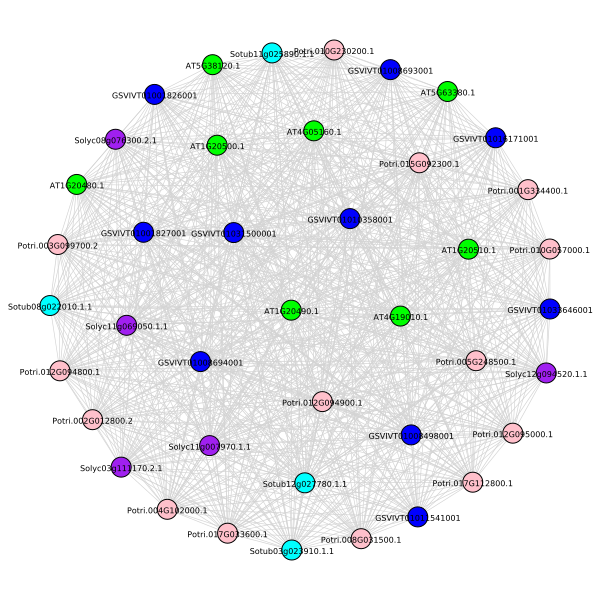

In [26]:
gene = '4CLL'
name_clean = 'eax'
a = 0.8
g_file = intermediate_path / "graphs" / f"{gene}-{name_clean}-{a}.ncol"
g = read_graph(g_file)

for v in g.vs():
    sp, na, _ = v['name'].split("_", 2)
    v['gene_id'] = na
    v['species'] = sp

g.vs()['label'] = g.vs()['gene_id']
color_dict = {"vvi": "blue", "ptr": "pink", 'ath':"green", "sly":"purple", "stu":"cyan"}
g.vs()['color'] = [color_dict[sp] for sp in g.vs()['species']]
g.es()['width'] = [weight for weight in g.es["weight"]]
g.vs()["label_size"] = 8
g.es()['color'] = 'lightgray'

graph_layout=g.layout('kk')

p = ig.plot(g, layout=graph_layout, margin=50)
display(p)

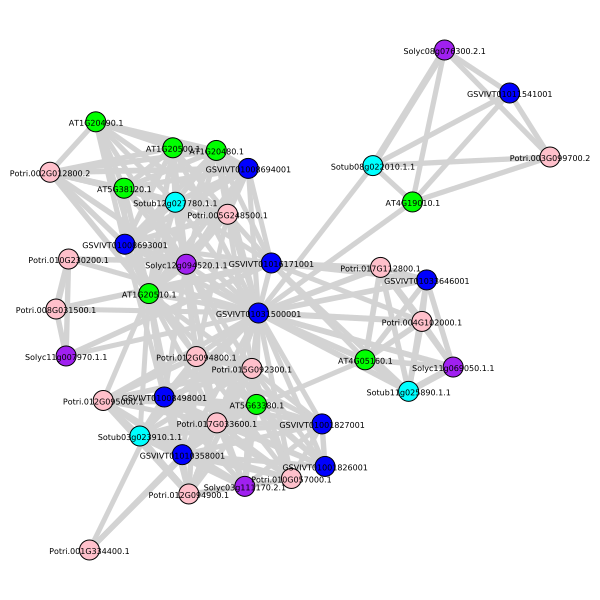

In [28]:
gene = '4CLL'
t = 'exa-0.5-05'
g = read_graph(f"../intermediate/t-graphs/{gene}-{t}.tsv")


for v in g.vs():
    sp, na, _ = v['name'].split("_", 2)
    v['gene_id'] = na
    v['species'] = sp

g.vs()['label'] = g.vs()['gene_id']
color_dict = {"vvi": "blue", "ptr": "pink", 'ath':"green", "sly":"purple", "stu":"cyan"}
g.vs()['color'] = [color_dict[sp] for sp in g.vs()['species']]
g.es()['width'] = [10* weight for weight in g.es["weight"]]
g.vs()["label_size"] = 8
g.es()['color'] = 'lightgray'

graph_layout=g.layout('kk')

p = ig.plot(g, layout=graph_layout, margin=50)
isplay(p)

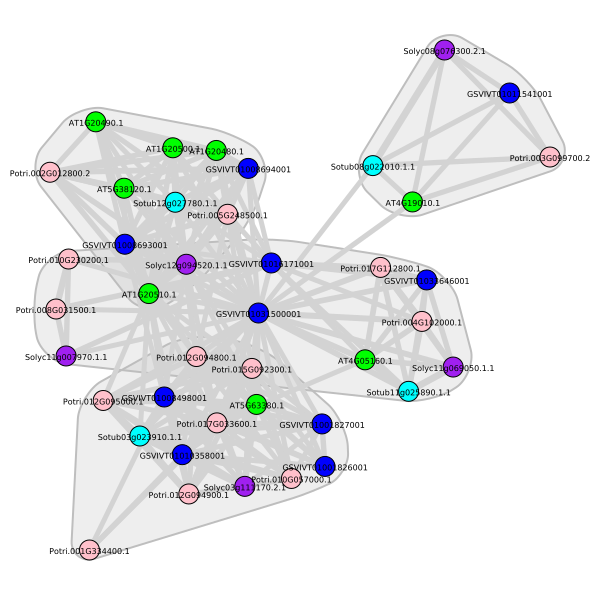

In [34]:

clusters = read_clusters(f"/home/cbleker/research/NIB/MSA/intermediate/cm-clusters/4CLL-exa-0.5-0.5-cm.tsv")

group_markers = [(cluster, 'gray') for cluster in cluster_names_to_id(g, clusters)]


p = ig.plot(g, layout=graph_layout, mark_groups=group_markers, margin=50)
display(p)

In [43]:
cluster_names_to_id(g, clusters)

[[19, 10, 8, 20, 1, 21, 17, 25, 29, 32, 37],
 [2, 5, 6, 13, 14, 24, 28, 36],
 [3, 15, 16, 26, 30, 31, 40],
 [0, 9, 22, 27, 33],
 [4, 7, 23, 39],
 [12, 18, 34, 38],
 [11, 35]]

In [31]:
g.vs()['name'] == clusters[0][0]

False

In [36]:
v = g.vs.find(name=clusters[0][0])

In [37]:
def 

19

In [35]:
for gene in test_cases:
    t = best_t[gene]
    print("--\n", gene, t)
    g = read_graph(f"../intermediate/t-graphs/{gene}-{t}.tsv")
    clusters = read_clusters(f"../intermediate/cm-clusters/{gene}-{t}-cm.tsv")
    
    for v in g.vs():
        sp, na, _ = v['name'].split("_", 2)
        v['gene_id'] = na
        v['species'] = sp

    g.vs()['label'] = g.vs()['gene_id']
    color_dict = {"vvi": "blue", "ptr": "pink", 'ath':"green", "sly":"purple", "stu":"cyan"}
    g.vs()['color'] = [color_dict[sp] for sp in g.vs()['species']]
    g.es()['width'] = [10 * weight for weight in g.es["weight"]]
    g.vs()["label_size"] = 8
    g.es()['color'] = 'lightgray'

    group_markers = [(cluster, 'gray') for cluster in cluster_names_to_id(g, clusters)]

    graph_layout=g.layout('kk')

    p = ig.plot(g, layout=graph_layout, mark_groups=group_markers, margin=50)
    display(p)

NameError: name 'best_t' is not defined

In [ ]:
for v in g.vs():
    sp, na, _ = v['name'].split("_", 2)
    v['gene_id'] = na
    v['species'] = sp

g.vs()['label'] = g.vs()['gene_id']
color_dict = {"vvi": "blue", "ptr": "pink", 'ath':"green", "sly":"purple", "stu":"cyan"}
g.vs()['color'] = [color_dict[sp] for sp in g.vs()['species']]
g.es()['width'] = [10 * weight for weight in g.es["weight"]]
g.vs()["label_size"] = 8
g.es()['color'] = 'lightgray'

#cm = g.community_optimal_modularity(weights='weight')
group_markers = [(cluster, 'gray') for cluster in cm]

graph_layout=g.layout('kk')

display(ig.plot(g, layout=graph_layout, mark_groups=group_markers, margin=50))


    
# to view and save as png
#display(ig.plot(new_g, f"t{round(t, 3)}.png", layout=graph_layout))



In [223]:
group_markers

[([0, 1, 8, 9, 11, 13, 16], 'gray'),
 ([2, 3, 4, 10, 12, 15], 'gray'),
 ([5, 6, 7, 14], 'gray')]

In [221]:
g.vcount()

17

In [199]:
cm = g.community_optimal_modularity(weights='weight')

In [201]:
cm.modularity

0.52176019416883

In [139]:
def overlaps(clusters1, clusters2, print_out=True):
    s = f"{'base-i':7}\t{'len(base)':7}\t{'c2_-i':5}\t{'len(c2)':7}\t|\t{'max_overlap':12}\t{'ov%':4}"
    if print_out: 
        print(s)
    ovs = []
    for i, c1 in enumerate(clusters1):
        c1 = set(c1)
        
        c2_idx = np.nan
        max_overlap = 0

        for j, c2 in enumerate(clusters2):
            
            c2 = set(c2)
            overlap = c1.intersection(c2)
            max_overlap = max(max_overlap, len(overlap))
            
            if max_overlap == len(overlap):
                c2_idx = j
        
        overlap_percentage = max_overlap / max(len(c1), len(clusters2[c2_idx]))
        s = f"{i:5}\t {len(c1):7}\t{c2_idx:5}\t{len(clusters2[c2_idx]):7}\t|\t{max_overlap:12}\t{overlap_percentage:1.3}"
        ovs.append(overlap_percentage)
        if print_out:
            print(s)
    return ovs
    
def maxmal_cliques(g):
    clusters = []
    for c in g.maximal_cliques()[::-1]:
        this_cluster  = []
        for v in c:
            this_cluster.append(g.vs()[v]['name'])
        clusters.append(this_cluster)
    return sorted(clusters, key=len, reverse=True)
    

In [79]:
# MCL clustering
mcl_cluster_files = {}
re_code = re.compile("\[mcl\] (\d+) clusters found")
for gene in test_cases:
    gene_cluster_files = {}
    graphs = graphs_per_gene[gene]
    for trans, file in graphs.items():
        for I in [2, 2.5, 3, 4, 5]:
            s = f"{gene:7}\t{trans:16}\t{I}\t"

            cluster_file = intermediate_path / "mcl-clusters" / f"{gene}-{trans}-mcl-I{I}.tsv"

            returned_value = subprocess.run(["mcl", file.as_posix(),  "-I" , str(I), "--abc", 
                                            "-te", "2", "-o", cluster_file.as_posix()], 
                                        capture_output=True, 
                                        text=True)
            clusters = re.findall(re_code, returned_value.stderr)

            if len(clusters) == 1:
                s += f"{clusters[0]:>4}"
            else:
                s += f"{'NA':4}"
            print(s)
            gene_cluster_files[f"{trans}-{I}"] = cluster_file
        mcl_cluster_files[gene] = gene_cluster_files

PR5    	1x-nan-0        	2	   1
PR5    	1x-nan-0        	2.5	   1
PR5    	1x-nan-0        	3	   1
PR5    	1x-nan-0        	4	   1
PR5    	1x-nan-0        	5	   1
PR5    	1x-nan-wg       	2	   7
PR5    	1x-nan-wg       	2.5	   8
PR5    	1x-nan-wg       	3	   9
PR5    	1x-nan-wg       	4	  11
PR5    	1x-nan-wg       	5	  12
PR5    	1x-nan-onecc    	2	   1
PR5    	1x-nan-onecc    	2.5	   1
PR5    	1x-nan-onecc    	3	   1
PR5    	1x-nan-onecc    	4	   1
PR5    	1x-nan-onecc    	5	   1
PR5    	1x-nan-05       	2	   2
PR5    	1x-nan-05       	2.5	   2
PR5    	1x-nan-05       	3	   2
PR5    	1x-nan-05       	4	   2
PR5    	1x-nan-05       	5	   2
PR5    	logx-nan-0      	2	   1
PR5    	logx-nan-0      	2.5	   1
PR5    	logx-nan-0      	3	   1
PR5    	logx-nan-0      	4	   1
PR5    	logx-nan-0      	5	   1
PR5    	logx-nan-wg     	2	   7
PR5    	logx-nan-wg     	2.5	   9
PR5    	logx-nan-wg     	3	   9
PR5    	logx-nan-wg     	4	  13
PR5    	logx-nan-wg     	5	  16
PR5    	logx-nan-onecc  	2	 

PR5    	exa-0.8-onecc   	5	   1
PR5    	exa-0.8-05      	2	   1
PR5    	exa-0.8-05      	2.5	   1
PR5    	exa-0.8-05      	3	   1
PR5    	exa-0.8-05      	4	   1
PR5    	exa-0.8-05      	5	   1
PR5    	exa-1-0         	2	   1
PR5    	exa-1-0         	2.5	   1
PR5    	exa-1-0         	3	   1
PR5    	exa-1-0         	4	   1
PR5    	exa-1-0         	5	   1
PR5    	exa-1-wg        	2	   6
PR5    	exa-1-wg        	2.5	   8
PR5    	exa-1-wg        	3	   9
PR5    	exa-1-wg        	4	  11
PR5    	exa-1-wg        	5	  11
PR5    	exa-1-onecc     	2	   1
PR5    	exa-1-onecc     	2.5	   1
PR5    	exa-1-onecc     	3	   1
PR5    	exa-1-onecc     	4	   1
PR5    	exa-1-onecc     	5	   1
PR5    	exa-1-05        	2	   1
PR5    	exa-1-05        	2.5	   1
PR5    	exa-1-05        	3	   1
PR5    	exa-1-05        	4	   1
PR5    	exa-1-05        	5	   1
PR5    	exa-3-0         	2	   1
PR5    	exa-3-0         	2.5	   1
PR5    	exa-3-0         	3	   1
PR5    	exa-3-0         	4	   1
PR5    	exa-3-0         	5	 

CO     	1x1-nan-wg      	3	   2
CO     	1x1-nan-wg      	4	   3
CO     	1x1-nan-wg      	5	   5
CO     	1x1-nan-onecc   	2	   1
CO     	1x1-nan-onecc   	2.5	   2
CO     	1x1-nan-onecc   	3	   2
CO     	1x1-nan-onecc   	4	   3
CO     	1x1-nan-onecc   	5	   5
CO     	1x1-nan-05      	2	   1
CO     	1x1-nan-05      	2.5	   2
CO     	1x1-nan-05      	3	   2
CO     	1x1-nan-05      	4	   3
CO     	1x1-nan-05      	5	   5
CO     	1x+a-0.2-0      	2	   1
CO     	1x+a-0.2-0      	2.5	   1
CO     	1x+a-0.2-0      	3	   1
CO     	1x+a-0.2-0      	4	   1
CO     	1x+a-0.2-0      	5	   1
CO     	1x+a-0.2-wg     	2	   1
CO     	1x+a-0.2-wg     	2.5	   1
CO     	1x+a-0.2-wg     	3	   1
CO     	1x+a-0.2-wg     	4	   1
CO     	1x+a-0.2-wg     	5	   1
CO     	1x+a-0.2-onecc  	2	   1
CO     	1x+a-0.2-onecc  	2.5	   1
CO     	1x+a-0.2-onecc  	3	   1
CO     	1x+a-0.2-onecc  	4	   1
CO     	1x+a-0.2-onecc  	5	   1
CO     	1x+a-0.2-05     	2	   1
CO     	1x+a-0.2-05     	2.5	   1
CO     	1x+a-0.2-05     	3	 

CO     	eax-0.2-0       	2	   1
CO     	eax-0.2-0       	2.5	   1
CO     	eax-0.2-0       	3	   1
CO     	eax-0.2-0       	4	   1
CO     	eax-0.2-0       	5	   1
CO     	eax-0.2-wg      	2	   1
CO     	eax-0.2-wg      	2.5	   1
CO     	eax-0.2-wg      	3	   1
CO     	eax-0.2-wg      	4	   1
CO     	eax-0.2-wg      	5	   1
CO     	eax-0.2-onecc   	2	   1
CO     	eax-0.2-onecc   	2.5	   1
CO     	eax-0.2-onecc   	3	   1
CO     	eax-0.2-onecc   	4	   1
CO     	eax-0.2-onecc   	5	   1
CO     	eax-0.2-05      	2	   1
CO     	eax-0.2-05      	2.5	   1
CO     	eax-0.2-05      	3	   1
CO     	eax-0.2-05      	4	   1
CO     	eax-0.2-05      	5	   1
CO     	eax-0.5-0       	2	   1
CO     	eax-0.5-0       	2.5	   1
CO     	eax-0.5-0       	3	   1
CO     	eax-0.5-0       	4	   1
CO     	eax-0.5-0       	5	   1
CO     	eax-0.5-wg      	2	   1
CO     	eax-0.5-wg      	2.5	   1
CO     	eax-0.5-wg      	3	   1
CO     	eax-0.5-wg      	4	   1
CO     	eax-0.5-wg      	5	   1
CO     	eax-0.5-onecc   	2	 

bHLH   	1x+a-0.8-05     	2.5	   1
bHLH   	1x+a-0.8-05     	3	   1
bHLH   	1x+a-0.8-05     	4	   1
bHLH   	1x+a-0.8-05     	5	   1
bHLH   	1x+a-1-0        	2	   1
bHLH   	1x+a-1-0        	2.5	   1
bHLH   	1x+a-1-0        	3	   1
bHLH   	1x+a-1-0        	4	   1
bHLH   	1x+a-1-0        	5	   1
bHLH   	1x+a-1-wg       	2	   1
bHLH   	1x+a-1-wg       	2.5	   1
bHLH   	1x+a-1-wg       	3	   1
bHLH   	1x+a-1-wg       	4	   1
bHLH   	1x+a-1-wg       	5	   1
bHLH   	1x+a-1-onecc    	2	   1
bHLH   	1x+a-1-onecc    	2.5	   1
bHLH   	1x+a-1-onecc    	3	   1
bHLH   	1x+a-1-onecc    	4	   1
bHLH   	1x+a-1-onecc    	5	   1
bHLH   	1x+a-1-05       	2	   1
bHLH   	1x+a-1-05       	2.5	   1
bHLH   	1x+a-1-05       	3	   1
bHLH   	1x+a-1-05       	4	   1
bHLH   	1x+a-1-05       	5	   1
bHLH   	1x+a-3-0        	2	   1
bHLH   	1x+a-3-0        	2.5	   1
bHLH   	1x+a-3-0        	3	   1
bHLH   	1x+a-3-0        	4	   1
bHLH   	1x+a-3-0        	5	   1
bHLH   	1x+a-3-wg       	2	   1
bHLH   	1x+a-3-wg       	2.5

bHLH   	eax-1-onecc     	4	   1
bHLH   	eax-1-onecc     	5	   1
bHLH   	eax-1-05        	2	   1
bHLH   	eax-1-05        	2.5	   1
bHLH   	eax-1-05        	3	   1
bHLH   	eax-1-05        	4	   1
bHLH   	eax-1-05        	5	   1
bHLH   	eax-3-0         	2	   1
bHLH   	eax-3-0         	2.5	   1
bHLH   	eax-3-0         	3	   1
bHLH   	eax-3-0         	4	   1
bHLH   	eax-3-0         	5	   1
bHLH   	eax-3-wg        	2	   1
bHLH   	eax-3-wg        	2.5	   1
bHLH   	eax-3-wg        	3	   1
bHLH   	eax-3-wg        	4	   1
bHLH   	eax-3-wg        	5	   1
bHLH   	eax-3-onecc     	2	   1
bHLH   	eax-3-onecc     	2.5	   1
bHLH   	eax-3-onecc     	3	   1
bHLH   	eax-3-onecc     	4	   1
bHLH   	eax-3-onecc     	5	   1
bHLH   	eax-3-05        	2	   2
bHLH   	eax-3-05        	2.5	   2
bHLH   	eax-3-05        	3	   2
bHLH   	eax-3-05        	4	   2
bHLH   	eax-3-05        	5	   2
bHLH   	eax-5-0         	2	   1
bHLH   	eax-5-0         	2.5	   1
bHLH   	eax-5-0         	3	   2
bHLH   	eax-5-0         	4	 

AGO    	exa-0.2-wg      	3	   2
AGO    	exa-0.2-wg      	4	   2
AGO    	exa-0.2-wg      	5	   2
AGO    	exa-0.2-onecc   	2	   1
AGO    	exa-0.2-onecc   	2.5	   1
AGO    	exa-0.2-onecc   	3	   1
AGO    	exa-0.2-onecc   	4	   1
AGO    	exa-0.2-onecc   	5	   1
AGO    	exa-0.2-05      	2	  15
AGO    	exa-0.2-05      	2.5	  15
AGO    	exa-0.2-05      	3	  15
AGO    	exa-0.2-05      	4	  15
AGO    	exa-0.2-05      	5	  15
AGO    	exa-0.5-0       	2	   1
AGO    	exa-0.5-0       	2.5	   1
AGO    	exa-0.5-0       	3	   1
AGO    	exa-0.5-0       	4	   1
AGO    	exa-0.5-0       	5	   1
AGO    	exa-0.5-wg      	2	   2
AGO    	exa-0.5-wg      	2.5	   2
AGO    	exa-0.5-wg      	3	   2
AGO    	exa-0.5-wg      	4	   2
AGO    	exa-0.5-wg      	5	   2
AGO    	exa-0.5-onecc   	2	   1
AGO    	exa-0.5-onecc   	2.5	   1
AGO    	exa-0.5-onecc   	3	   1
AGO    	exa-0.5-onecc   	4	   1
AGO    	exa-0.5-onecc   	5	   1
AGO    	exa-0.5-05      	2	   5
AGO    	exa-0.5-05      	2.5	   5
AGO    	exa-0.5-05      	3	 

ACS    	logx-nan-0      	2.5	   1
ACS    	logx-nan-0      	3	   1
ACS    	logx-nan-0      	4	   1
ACS    	logx-nan-0      	5	   1
ACS    	logx-nan-wg     	2	   2
ACS    	logx-nan-wg     	2.5	   2
ACS    	logx-nan-wg     	3	   2
ACS    	logx-nan-wg     	4	   2
ACS    	logx-nan-wg     	5	   3
ACS    	logx-nan-onecc  	2	   1
ACS    	logx-nan-onecc  	2.5	   1
ACS    	logx-nan-onecc  	3	   1
ACS    	logx-nan-onecc  	4	   1
ACS    	logx-nan-onecc  	5	   1
ACS    	logx-nan-05     	2	   1
ACS    	logx-nan-05     	2.5	   1
ACS    	logx-nan-05     	3	   1
ACS    	logx-nan-05     	4	   1
ACS    	logx-nan-05     	5	   1
ACS    	sqrt1x-nan-0    	2	   1
ACS    	sqrt1x-nan-0    	2.5	   1
ACS    	sqrt1x-nan-0    	3	   1
ACS    	sqrt1x-nan-0    	4	   1
ACS    	sqrt1x-nan-0    	5	   1
ACS    	sqrt1x-nan-wg   	2	   1
ACS    	sqrt1x-nan-wg   	2.5	   2
ACS    	sqrt1x-nan-wg   	3	   2
ACS    	sqrt1x-nan-wg   	4	   2
ACS    	sqrt1x-nan-wg   	5	   3
ACS    	sqrt1x-nan-onecc	2	   1
ACS    	sqrt1x-nan-onecc	2.5

ACS    	exa-1-onecc     	5	   1
ACS    	exa-1-05        	2	   1
ACS    	exa-1-05        	2.5	   1
ACS    	exa-1-05        	3	   1
ACS    	exa-1-05        	4	   1
ACS    	exa-1-05        	5	   1
ACS    	exa-3-0         	2	   1
ACS    	exa-3-0         	2.5	   1
ACS    	exa-3-0         	3	   1
ACS    	exa-3-0         	4	   1
ACS    	exa-3-0         	5	   1
ACS    	exa-3-wg        	2	   1
ACS    	exa-3-wg        	2.5	   2
ACS    	exa-3-wg        	3	   2
ACS    	exa-3-wg        	4	   2
ACS    	exa-3-wg        	5	   3
ACS    	exa-3-onecc     	2	   1
ACS    	exa-3-onecc     	2.5	   1
ACS    	exa-3-onecc     	3	   1
ACS    	exa-3-onecc     	4	   1
ACS    	exa-3-onecc     	5	   1
ACS    	exa-3-05        	2	   1
ACS    	exa-3-05        	2.5	   1
ACS    	exa-3-05        	3	   1
ACS    	exa-3-05        	4	   1
ACS    	exa-3-05        	5	   1
ACS    	exa-5-0         	2	   1
ACS    	exa-5-0         	2.5	   1
ACS    	exa-5-0         	3	   1
ACS    	exa-5-0         	4	   1
ACS    	exa-5-0         	5	 

4CLL   	1x+a-0.2-onecc  	3	   1
4CLL   	1x+a-0.2-onecc  	4	   1
4CLL   	1x+a-0.2-onecc  	5	   1
4CLL   	1x+a-0.2-05     	2	   1
4CLL   	1x+a-0.2-05     	2.5	   1
4CLL   	1x+a-0.2-05     	3	   1
4CLL   	1x+a-0.2-05     	4	   1
4CLL   	1x+a-0.2-05     	5	   1
4CLL   	1x+a-0.5-0      	2	   1
4CLL   	1x+a-0.5-0      	2.5	   1
4CLL   	1x+a-0.5-0      	3	   1
4CLL   	1x+a-0.5-0      	4	   1
4CLL   	1x+a-0.5-0      	5	   1
4CLL   	1x+a-0.5-wg     	2	   7
4CLL   	1x+a-0.5-wg     	2.5	   7
4CLL   	1x+a-0.5-wg     	3	   7
4CLL   	1x+a-0.5-wg     	4	   8
4CLL   	1x+a-0.5-wg     	5	   8
4CLL   	1x+a-0.5-onecc  	2	   1
4CLL   	1x+a-0.5-onecc  	2.5	   1
4CLL   	1x+a-0.5-onecc  	3	   1
4CLL   	1x+a-0.5-onecc  	4	   1
4CLL   	1x+a-0.5-onecc  	5	   1
4CLL   	1x+a-0.5-05     	2	   1
4CLL   	1x+a-0.5-05     	2.5	   1
4CLL   	1x+a-0.5-05     	3	   1
4CLL   	1x+a-0.5-05     	4	   1
4CLL   	1x+a-0.5-05     	5	   1
4CLL   	1x+a-0.8-0      	2	   1
4CLL   	1x+a-0.8-0      	2.5	   1
4CLL   	1x+a-0.8-0      	3	 

4CLL   	eax-0.5-wg      	5	   7
4CLL   	eax-0.5-onecc   	2	   1
4CLL   	eax-0.5-onecc   	2.5	   1
4CLL   	eax-0.5-onecc   	3	   1
4CLL   	eax-0.5-onecc   	4	   1
4CLL   	eax-0.5-onecc   	5	   1
4CLL   	eax-0.5-05      	2	   1
4CLL   	eax-0.5-05      	2.5	   1
4CLL   	eax-0.5-05      	3	   1
4CLL   	eax-0.5-05      	4	   1
4CLL   	eax-0.5-05      	5	   1
4CLL   	eax-0.8-0       	2	   1
4CLL   	eax-0.8-0       	2.5	   1
4CLL   	eax-0.8-0       	3	   1
4CLL   	eax-0.8-0       	4	   1
4CLL   	eax-0.8-0       	5	   1
4CLL   	eax-0.8-wg      	2	   7
4CLL   	eax-0.8-wg      	2.5	   7
4CLL   	eax-0.8-wg      	3	   7
4CLL   	eax-0.8-wg      	4	   7
4CLL   	eax-0.8-wg      	5	   7
4CLL   	eax-0.8-onecc   	2	   1
4CLL   	eax-0.8-onecc   	2.5	   1
4CLL   	eax-0.8-onecc   	3	   1
4CLL   	eax-0.8-onecc   	4	   1
4CLL   	eax-0.8-onecc   	5	   1
4CLL   	eax-0.8-05      	2	   1
4CLL   	eax-0.8-05      	2.5	   1
4CLL   	eax-0.8-05      	3	   1
4CLL   	eax-0.8-05      	4	   1
4CLL   	eax-0.8-05      	5	 

In [75]:
for gene in test_cases:
    gene_cluster_files = mcl_cluster_files[gene]
    for trans_I, file in gene_cluster_files.items():
        mcl = read_clusters(file)
        print(gene, trans_I, "mcl", "\t\t", len(real_clusters[gene]), len(mcl))
        if len(mcl) > 0:
            overlaps(real_clusters[gene], mcl)

PR5 1x-nan-wg-2 mcl 		 15 7
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    4	|      13	      8	           1	0.0769
    1	    1	|      12	     12	           1	0.0833
    2	    0	|       9	     20	           1	0.05
    3	    3	|       8	      9	           1	0.111
    4	    0	|       8	     20	           1	0.05
    5	    4	|       7	      8	           1	0.125
    6	    6	|       7	      7	           1	0.143
    7	    5	|       5	      8	           1	0.125
    8	    5	|       1	      8	           1	0.125
    9	    5	|       1	      8	           1	0.125
   10	    5	|       1	      8	           1	0.125
   11	    0	|       1	     20	           1	0.05
   12	    0	|       1	     20	           1	0.05
   13	    0	|       1	     20	           1	0.05
   14	    0	|       1	     20	           1	0.05
PR5 1x-nan-wg-2.5 mcl 		 15 8
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    4	|      13	      8	           1	0.0769
    1	    1	|      12	     12	           1	0.0833
    2	    0	|  

PR5 1x+a-0.8-05-3 mcl 		 15 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      13	     76	           1	0.0132
    1	    0	|      12	     76	           1	0.0132
    2	    0	|       9	     76	           1	0.0132
    3	    0	|       8	     76	           1	0.0132
    4	    0	|       8	     76	           1	0.0132
    5	    0	|       7	     76	           1	0.0132
    6	    0	|       7	     76	           1	0.0132
    7	    0	|       5	     76	           1	0.0132
    8	    0	|       1	     76	           1	0.0132
    9	    0	|       1	     76	           1	0.0132
   10	    0	|       1	     76	           1	0.0132
   11	    0	|       1	     76	           1	0.0132
   12	    0	|       1	     76	           1	0.0132
   13	    0	|       1	     76	           1	0.0132
   14	    0	|       1	     76	           1	0.0132
PR5 1x+a-0.8-05-4 mcl 		 15 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      13	     76	           1	0.0132
    1	    0	|      12	     76	           1	0

PR5 exa-3-wg-5 mcl 		 15 11
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      13	     13	           1	0.0769
    1	    1	|      12	     13	           1	0.0769
    2	    8	|       9	      4	           1	0.111
    3	    6	|       8	      5	           1	0.125
    4	    0	|       8	     14	           1	0.0714
    5	    1	|       7	     13	           1	0.0769
    6	    4	|       7	      7	           1	0.143
    7	    3	|       5	      8	           1	0.125
    8	    3	|       1	      8	           1	0.125
    9	    3	|       1	      8	           1	0.125
   10	    3	|       1	      8	           1	0.125
   11	   10	|       1	      2	           1	0.5
   12	   10	|       1	      2	           1	0.5
   13	    8	|       1	      4	           1	0.25
   14	    8	|       1	      4	           1	0.25
PR5 exa-3-onecc-2 mcl 		 15 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      13	     76	           1	0.0132
    1	    0	|      12	     76	           1	0.0132
    2	    0	|

PR5 eax-3-05-4 mcl 		 15 16
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    9	|      13	      2	           1	0.0769
    1	    7	|      12	      2	           1	0.0833
    2	    2	|       9	      2	           1	0.111
    3	   15	|       8	      2	           0	0.0
    4	   15	|       8	      2	           0	0.0
    5	   15	|       7	      2	           0	0.0
    6	    1	|       7	      3	           1	0.143
    7	   10	|       5	      2	           1	0.2
    8	   15	|       1	      2	           0	0.0
    9	   15	|       1	      2	           0	0.0
   10	   15	|       1	      2	           0	0.0
   11	   14	|       1	      2	           1	0.5
   12	   14	|       1	      2	           1	0.5
   13	   15	|       1	      2	           1	0.5
   14	   15	|       1	      2	           1	0.5
PR5 eax-3-05-5 mcl 		 15 16
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    9	|      13	      2	           1	0.0769
    1	    7	|      12	      2	           1	0.0833
    2	    2	|       9	      2	   

CO exa-0.2-05-2 mcl 		 6 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      13	      2	           0	0.0
    1	    0	|       9	      2	           1	0.111
    2	    1	|       6	      2	           0	0.0
    3	    1	|       1	      2	           0	0.0
    4	    1	|       1	      2	           0	0.0
    5	    1	|       1	      2	           0	0.0
CO exa-0.2-05-2.5 mcl 		 6 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      13	      2	           0	0.0
    1	    0	|       9	      2	           1	0.111
    2	    1	|       6	      2	           0	0.0
    3	    1	|       1	      2	           0	0.0
    4	    1	|       1	      2	           0	0.0
    5	    1	|       1	      2	           0	0.0
CO exa-0.2-05-3 mcl 		 6 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      13	      2	           0	0.0
    1	    0	|       9	      2	           1	0.111
    2	    1	|       6	      2	           0	0.0
    3	    1	|       1	      2	           0	0.0
    4	    1	|  

bHLH logx-nan-05-5 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     17	           1	0.0588
    1	    0	|       4	     17	           1	0.0588
    2	    0	|       4	     17	           1	0.0588
    3	    0	|       1	     17	           1	0.0588
    4	    0	|       1	     17	           1	0.0588
bHLH sqrt1x-nan-wg-2 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     18	           1	0.0556
    1	    0	|       4	     18	           1	0.0556
    2	    0	|       4	     18	           1	0.0556
    3	    0	|       1	     18	           1	0.0556
    4	    0	|       1	     18	           1	0.0556
bHLH sqrt1x-nan-wg-2.5 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     18	           1	0.0556
    1	    0	|       4	     18	           1	0.0556
    2	    0	|       4	     18	           1	0.0556
    3	    0	|       1	     18	           1	0.0556
    4	    0	|       1	     18	           1	0.0556
bHLH sqrt1

bHLH exa-5-05-4 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     18	           1	0.0556
    1	    0	|       4	     18	           1	0.0556
    2	    0	|       4	     18	           1	0.0556
    3	    0	|       1	     18	           1	0.0556
    4	    0	|       1	     18	           1	0.0556
bHLH exa-5-05-5 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     18	           1	0.0556
    1	    0	|       4	     18	           1	0.0556
    2	    0	|       4	     18	           1	0.0556
    3	    0	|       1	     18	           1	0.0556
    4	    0	|       1	     18	           1	0.0556
bHLH eax-0.2-wg-2 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|       8	     18	           1	0.0556
    1	    0	|       4	     18	           1	0.0556
    2	    0	|       4	     18	           1	0.0556
    3	    0	|       1	     18	           1	0.0556
    4	    0	|       1	     18	           1	0.0556
bHLH eax-0.2-wg-2.5 mcl

AGO 1x+a-0.2-05-2.5 mcl 		 14 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     85	           1	0.0118
    1	    0	|      12	     85	           1	0.0118
    2	    0	|      11	     85	           1	0.0118
    3	    0	|       9	     85	           1	0.0118
    4	    0	|       9	     85	           1	0.0118
    5	    0	|       8	     85	           1	0.0118
    6	    0	|       6	     85	           1	0.0118
    7	    0	|       6	     85	           1	0.0118
    8	    0	|       5	     85	           1	0.0118
    9	    0	|       1	     85	           1	0.0118
   10	    0	|       1	     85	           1	0.0118
   11	    0	|       1	     85	           1	0.0118
   12	    0	|       1	     85	           1	0.0118
   13	    0	|       1	     85	           1	0.0118
AGO 1x+a-0.2-05-3 mcl 		 14 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     85	           1	0.0118
    1	    0	|      12	     85	           1	0.0118
    2	    0	|      11	     85	           1

AGO exa-0.8-wg-4 mcl 		 14 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	     14	           1	0.0714
    1	    0	|      12	     71	           1	0.0141
    2	    0	|      11	     71	           1	0.0141
    3	    0	|       9	     71	           1	0.0141
    4	    0	|       9	     71	           1	0.0141
    5	    0	|       8	     71	           1	0.0141
    6	    0	|       6	     71	           1	0.0141
    7	    0	|       6	     71	           1	0.0141
    8	    0	|       5	     71	           1	0.0141
    9	    0	|       1	     71	           1	0.0141
   10	    0	|       1	     71	           1	0.0141
   11	    0	|       1	     71	           1	0.0141
   12	    0	|       1	     71	           1	0.0141
   13	    0	|       1	     71	           1	0.0141
AGO exa-0.8-wg-5 mcl 		 14 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	     14	           1	0.0714
    1	    0	|      12	     71	           1	0.0141
    2	    0	|      11	     71	           1	0.0

AGO eax-1-onecc-2 mcl 		 14 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     85	           1	0.0118
    1	    0	|      12	     85	           1	0.0118
    2	    0	|      11	     85	           1	0.0118
    3	    0	|       9	     85	           1	0.0118
    4	    0	|       9	     85	           1	0.0118
    5	    0	|       8	     85	           1	0.0118
    6	    0	|       6	     85	           1	0.0118
    7	    0	|       6	     85	           1	0.0118
    8	    0	|       5	     85	           1	0.0118
    9	    0	|       1	     85	           1	0.0118
   10	    0	|       1	     85	           1	0.0118
   11	    0	|       1	     85	           1	0.0118
   12	    0	|       1	     85	           1	0.0118
   13	    0	|       1	     85	           1	0.0118
AGO eax-1-onecc-2.5 mcl 		 14 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     85	           1	0.0118
    1	    0	|      12	     85	           1	0.0118
    2	    0	|      11	     85	           1

ACS 1x+a-0.5-onecc-4 mcl 		 9 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      15	     64	           1	0.0156
    1	    0	|      15	     64	           1	0.0156
    2	    0	|       9	     64	           1	0.0156
    3	    0	|       6	     64	           1	0.0156
    4	    0	|       6	     64	           1	0.0156
    5	    0	|       5	     64	           1	0.0156
    6	    0	|       3	     64	           1	0.0156
    7	    0	|       3	     64	           1	0.0156
    8	    0	|       2	     64	           1	0.0156
ACS 1x+a-0.5-onecc-5 mcl 		 9 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      15	     64	           1	0.0156
    1	    0	|      15	     64	           1	0.0156
    2	    0	|       9	     64	           1	0.0156
    3	    0	|       6	     64	           1	0.0156
    4	    0	|       6	     64	           1	0.0156
    5	    0	|       5	     64	           1	0.0156
    6	    0	|       3	     64	           1	0.0156
    7	    0	|       3	     64	          

ACS exa-3-05-4 mcl 		 9 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      15	     64	           1	0.0156
    1	    0	|      15	     64	           1	0.0156
    2	    0	|       9	     64	           1	0.0156
    3	    0	|       6	     64	           1	0.0156
    4	    0	|       6	     64	           1	0.0156
    5	    0	|       5	     64	           1	0.0156
    6	    0	|       3	     64	           1	0.0156
    7	    0	|       3	     64	           1	0.0156
    8	    0	|       2	     64	           1	0.0156
ACS exa-3-05-5 mcl 		 9 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      15	     64	           1	0.0156
    1	    0	|      15	     64	           1	0.0156
    2	    0	|       9	     64	           1	0.0156
    3	    0	|       6	     64	           1	0.0156
    4	    0	|       6	     64	           1	0.0156
    5	    0	|       5	     64	           1	0.0156
    6	    0	|       3	     64	           1	0.0156
    7	    0	|       3	     64	           1	0.0156
  

4CLL 1x1-nan-05-5 mcl 		 5 5
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     33	          10	0.303
    1	    0	|      11	     33	           9	0.273
    2	    0	|      11	     33	          11	0.333
    3	    2	|       4	      2	           2	0.5
    4	    0	|       1	     33	           1	0.0303
4CLL 1x+a-0.2-wg-2 mcl 		 5 7
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    0	|      11	     11	          11	1.0
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
4CLL 1x+a-0.2-wg-2.5 mcl 		 5 7
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    0	|      11	     11	          11	1.0
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
4CLL 1x+a-0.2-wg-3 mcl 		 5 8
c1-i 	c2_-i	|

4CLL exa-5-05-5 mcl 		 5 1
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     41	          14	0.341
    1	    0	|      11	     41	          11	0.268
    2	    0	|      11	     41	          11	0.268
    3	    0	|       4	     41	           4	0.0976
    4	    0	|       1	     41	           1	0.0244
4CLL eax-0.2-wg-2 mcl 		 5 7
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    0	|      11	     11	          11	1.0
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
4CLL eax-0.2-wg-2.5 mcl 		 5 7
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    0	|      11	     11	          11	1.0
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
4CLL eax-0.2-wg-3 mcl 		 5 7
c1-i 	c2_-i	| l

In [34]:
def write_clusters(clusters, file):
    with open(file, 'w') as f:
        for cluster in clusters: 
            f.write('\t'.join(cluster) + '\n')

In [ ]:
cm_cluster_files = {}
for gene in test_cases:
    gene_cluster_files = {}
    graphs = graphs_per_gene[gene]
    for trans, file in graphs.items():
        print(gene, trans)
        g = read_graph(file)
        cm = g.community_optimal_modularity()
        cm_clusters = []
        for sg in cm.subgraphs():
            cm_clusters.append(sg.vs()['name'])       
        cluster_file = intermediate_path / "cm-clusters" / f"{gene}-{trans}-cm.tsv"
        write_clusters(cm_clusters, cluster_file, )
    
        gene_cluster_files[f"{trans}"] = cluster_file
    cm_cluster_files[gene] = gene_cluster_files        

PR5 1x-nan-0
PR5 1x-nan-wg
PR5 1x-nan-onecc
PR5 1x-nan-05


In [1]:
import os

In [3]:
os.stat("../intermediate/t-graphs/PR5-1x+a-3-05.tsv").st_size

FileNotFoundError: [Errno 2] No such file or directory: '../intermediate/t-graphs/PR5-1x+a-3-0tsv'

In [5]:
os.path.exists("../intermediate/t-graphs/PR5-1x+a-3-05.tsv")

True

In [ ]:
# 4CLL v cm
# c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
#     0	    2	|      14	     14	          14	1.0
#     1	    3	|      11	     11	          11	1.0
#     2	    3	|      11	     11	          11	1.0
#     3	    1	|       4	      6	           4	0.667
#     4	    1	|       1	      6	           1	0.167

In [ ]:
dir(cm)

In [27]:
cm_clusters

[['ath_AT4G38660.1_(PR5[76]_18[76])',
  'ath_AT4G24180.1_(PR5[76]_18[76])',
  'ath_AT4G36000.1_(PR5[76]_18[76])',
  'ptr_Potri.009G132500.1_(PR5[76]_18[76])',
  'ptr_Potri.004G173200.1_(PR5[76]_18[76])',
  'ptr_Potri.005G241000.1_(PR5[76]_18[76])',
  'ptr_Potri.005G112600.1_(PR5[76]_18[76])',
  'ptr_Potri.002G020400.1_(PR5[76]_18[76])',
  'sly_Solyc01g111330.2.1_(PR5[76]_18[76])',
  'sly_Solyc02g083760.2.1_(PR5[76]_18[76])',
  'sly_Solyc04g081560.2.1_(PR5[76]_18[76])',
  'sly_Solyc01g086840.1.1_(PR5[76]_18[76])',
  'stu_Sotub01g048740.1.1_(PR5[76]_18[76])',
  'stu_Sotub02g027100.1.1_(PR5[76]_18[76])',
  'stu_Sotub01g026700.1.1_(PR5[76]_18[76])',
  'vvi_GSVIVT01024050001_(PR5[76]_18[76])',
  'vvi_GSVIVT01018767001_(PR5[76]_18[76])',
  'vvi_GSVIVT01009930001_(PR5[76]_18[76])',
  'vvi_GSVIVT01032051001_(PR5[76]_18[76])',
  'vvi_GSVIVT01027712001_(PR5[76]_18[76])'],
 ['ath_AT5G24620.1_(PR5[76]_18[76])',
  'ptr_Potri.012G004800.2_(PR5[76]_18[76])',
  'ptr_Potri.015G000800.1_(PR5[76]_18[76])

In [28]:
real_clusters[gene]

[['sly_Solyc07g017970.1.1_(PR5[76]_18[76]',
  'vvi_GSVIVT01033694001_(PR5[76]_18[76]',
  'ptr_Potri.001G220900.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221300.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221400.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221700.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221100.1_(PR5[76]_18[76]',
  'ptr_Potri.001G222100.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221200.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221500.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221800.1_(PR5[76]_18[76]',
  'ptr_Potri.001G221900.1_(PR5[76]_18[76]',
  'stu_Sotub02g027140.1.1_(PR5[76]_18[76]'],
 ['vvi_GSVIVT01024052001_(PR5[76]_18[76]',
  'stu_Sotub01g048730.1.1_(PR5[76]_18[76]',
  'sly_Solyc01g111320.2.1_(PR5[76]_18[76]',
  'ptr_Potri.009G132200.1_(PR5[76]_18[76]',
  'ath_AT4G38670.1_(PR5[76]_18[76]',
  'ath_AT1G20030.2_(PR5[76]_18[76]',
  'ath_AT1G75800.1_(PR5[76]_18[76]',
  'ptr_Potri.005G240900.1_(PR5[76]_18[76]',
  'ptr_Potri.002G020500.1_(PR5[76]_18[76]',
  'vvi_GSVIVT01009928001_(PR5[76]_18[76]',
  'stu_Sotu

In [147]:
c.summary()

'Clustering with 41 elements and 3 clusters'

In [149]:
# https://www.pnas.org/content/103/23/8577
cm = this_g.community_optimal_modularity()

In [152]:
cm.summary()

'Clustering with 41 elements and 4 clusters'

In [158]:
cm_clusters = []
for sg in cm.subgraphs():
    cm_clusters.append(sg.vs()['name'])

In [159]:
overlaps(k4cll, cm_clusters)

c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    2	|      14	     14	          14	1.0
    1	    3	|      11	     11	          11	1.0
    2	    3	|      11	     11	          11	1.0
    3	    1	|       4	      6	           4	0.667
    4	    1	|       1	      6	           1	0.167


In [132]:
overlaps(k4cll, mc)q

c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    0	|      14	     14	          12	0.857
    1	   44	|      11	      9	           8	0.727
    2	   44	|      11	      9	           8	0.727
    3	   57	|       4	      6	           4	0.667
    4	   57	|       1	      6	           1	0.167


In [136]:
gene = '4CLL'


wg /mcl 2
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    2	|      11	      7	           7	0.636
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
wg /mcl 2.5
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    2	|      11	      7	           7	0.636
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
wg /mcl 3
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	0.571
    1	    2	|      11	      7	           7	0.636
    2	    2	|      11	      7	           7	0.636
    3	    3	|       4	      5	           4	0.8
    4	    3	|       1	      5	           1	0.2
wg /mcl 4
c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 	ov% 
    0	    1	|      14	      8	           8	

In [73]:
overlaps(mcl, k4cll)

c1-i 	c2_-i	| len(c1)	len(c2)	max_overlap 
    0	    4	|      37	     14	          14
    1	    1	|       4	      4	           4


In [74]:
co

'05'

In [69]:
gene

'4CLL'

In [ ]:
['wg', 'onecc', '05']

In [485]:
for c in 

In [506]:
returned_value = subprocess.run(["mcl", new_file.as_posix(),  "--abc"], 
                                capture_output=True, 
                                text=True)      

In [535]:
returned_value.stderr

"___ [mcxOptParse] unsupported option <-I 5>\n___ [mcl] error while parsing options\n[mcl] do 'mcl - -h' or 'man mcl'\n"

In [526]:
re.findall(re_code, s)

['7']

In [524]:
re.findall("\[mcl\] (\d+) clusters found", s)

['7']

In [528]:
gene

'4CLL'

In [520]:
s

'[mcl] new tab created\n[mcl] pid 260444\n ite -------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv\n  1  .............   2.43  0.00 1.02/0.46/1.55 1.30 1.30 1.30  95\n  2  .............   3.40  0.00 0.92/0.57/1.02 1.51 1.31 1.71  95\n  3  .............   3.58  0.00 0.82/0.50/1.00 1.16 0.87 1.48  95\n  4  .............   1.30  0.00 0.79/0.53/1.26 1.33 0.79 1.17  95\n  5  .............   1.46  0.00 0.77/0.56/1.00 1.15 0.88 1.03  95\n  6  .............   0.83  0.00 0.80/0.64/1.00 1.00 0.90 0.93  95\n  7  .............   1.32  0.00 0.83/0.48/1.00 1.00 0.71 0.67  85\n  8  .............   0.86  0.00 0.85/0.65/1.00 0.99 0.80 0.54  85\n  9  .............   0.42  0.00 0.89/0.70/1.00 0.99 0.74 0.40  56\n 10  .............   0.25  0.00 0.91/0.76/1.00 0.99 0.63 0.26  56\n 11  .............   0.13  0.00 0.96/0.87/1.00 0.99 0.99 0.26  12\n 12  .............   0.01  0.00 1.00/0.99/1.00 0.99 0.84 0.22  12\n 13  .............   0.00  0.00 1.00/1.00/1.00 0.98 0.73 0.16   0\n[mcl] jury pruning m

In [510]:
print(s)

[mcl] new tab created
[mcl] pid 260444
 ite -------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  .............   2.43  0.00 1.02/0.46/1.55 1.30 1.30 1.30  95
  2  .............   3.40  0.00 0.92/0.57/1.02 1.51 1.31 1.71  95
  3  .............   3.58  0.00 0.82/0.50/1.00 1.16 0.87 1.48  95
  4  .............   1.30  0.00 0.79/0.53/1.26 1.33 0.79 1.17  95
  5  .............   1.46  0.00 0.77/0.56/1.00 1.15 0.88 1.03  95
  6  .............   0.83  0.00 0.80/0.64/1.00 1.00 0.90 0.93  95
  7  .............   1.32  0.00 0.83/0.48/1.00 1.00 0.71 0.67  85
  8  .............   0.86  0.00 0.85/0.65/1.00 0.99 0.80 0.54  85
  9  .............   0.42  0.00 0.89/0.70/1.00 0.99 0.74 0.40  56
 10  .............   0.25  0.00 0.91/0.76/1.00 0.99 0.63 0.26  56
 11  .............   0.13  0.00 0.96/0.87/1.00 0.99 0.99 0.26  12
 12  .............   0.01  0.00 1.00/0.99/1.00 0.99 0.84 0.22  12
 13  .............   0.00  0.00 1.00/1.00/1.00 0.98 0.73 0.16   0
[mcl] jury pruning marks: <100,99,99>

In [499]:
returned_value.args

['mcl', '../output/graphs/4CLL-ape-exp-wg.tsv', '--abc']

In [500]:
returned_value.stdout

In [494]:
new_file.as_posix()

'../output/graphs/4CLL-ape-exp-wg.tsv'

In [20]:
x["Value"].min(), x["Value"].max()

(0.0, 0.594088525786005)

In [21]:
P = {}
for t in np.linspace(0.4, 0.56, 4): #np.linspace(x["Value"].min(), x["Value"].max(), 4): #start, stop, number
    selector = g.es.select(lambda x:x['weight']>= t)
    this_g = g.subgraph_edges(selector)
    P[t] = {}
    P[t]['g'] = this_g
    lyt = this_g.layout('kk')
    lyt.center(0, 0)
    P[t]['lyt'] = lyt
    P[t]['vc'] = this_g.vs()['color']

In [22]:
min_w = 0.3
max_w = x["Value"].max()

In [32]:
Plotlys = {}
i = 1
for t in P.keys():

    p = pp.plotly_plot2D_large([[x[0], x[1]] for x in P[t]['lyt']], 
                               P[t]['g'].vs()['label'], 
                               P[t]['vc']
                              )

    if i == 1:
        p.get_edges_trace([(x.source, x.target) for x in P[t]['g'].es()], 
                          np.array([x['weight'] for x in P[t]['g'].es()]), 
                          colorscale='YlOrBr', 
                          colorbar=True, 
                          min_w = min_w,  
                          max_w = max_w, 
                          colorbar_title_text="Weight"
                         )
        _ = p.plot(colorbar=True)
    else:
        p.get_edges_trace([(x.source, x.target) for x in P[t]['g'].es()], 
                          np.array([x['weight'] for x in P[t]['g'].es()]),
                          colorscale='YlOrBr',
                          min_w = min_w, 
                          max_w = max_w, 
                          colorbar=False,
                         )
        _ = p.plot(colorbar=False)
    
    i+=1
    Plotlys[t] = p
    
    print(t)

0.4
0.45333333333333337
0.5066666666666667
0.56


In [33]:
nrows = 2 #len(meg.passes[:-1])
ncols = 2

Fig = pp.make_subplots(rows=nrows, #int(math.ceil(len(epochs)/2)), 
                    cols=ncols, 
                    shared_xaxes=True, shared_yaxes=True, 
                   vertical_spacing=0.01, horizontal_spacing=0.01, 
                   #subplot_titles=[str(epoch_s) + "s" for epoch_s in epochs], 
                   subplot_titles = [str(round(t, 3)) for t in Plotlys.keys()]
                   )


In [34]:
col = 0
row = 0


for i, t in enumerate(Plotlys):
    p = Plotlys[t]
    
    Fig.add_traces(p.data, rows=[row+1]*len(p.data), cols=[col+1]*len(p.data), )
    
    row = row + (i % nrows)
    col = (i+1) % ncols

In [35]:
xaxis=dict(
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          #title='Y' # y =side to side
          )

yaxis=dict(
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          #title='X' # x = front back
          )

layouts = {}
for i in range(1, len(Plotlys)+1):
    if i == 1:
        idx = "axis" + ""
    else: 
        idx = "axis" + str(i)
    xlayout = Fig.layout["x"+idx]
    ylayout = Fig.layout["y" + idx]
    for k, value in xaxis.items():
        xlayout[k] = value
    for k, value in yaxis.items():
        ylayout[k] = value
    layouts["x"+idx] = xlayout
    layouts["y"+idx] = ylayout
    

In [36]:
_= Fig.update_layout(height=500, width=500, 
                     showlegend=False, 
                     **layouts)

In [37]:
Fig.show()

In [125]:
t = 0
selector = g.es.select(lambda x:x['weight']>= t)
this_g = g.subgraph_edges(selector)
write_igraph(this_g, "test.tsv", )

In [126]:
t = whole_graph_cut_off(g)
selector = g.es.select(lambda x:x['weight']>= t)
this_g = g.subgraph_edges(selector)
write_igraph(this_g, "test_wg.tsv", )

In [76]:
spp = defaultdict(dict)
for s in list(df.index):
    sp, na, _ = s.split("_", 2) 
    spp[s]['species'] = sp
    spp[s]['gene_id'] = na



for v in g.vs():
    v['gene_id'] = spp[v['name']]['gene_id']
    v['species'] = spp[v['name']]['species']

g.vs()['label'] = g.vs()['gene_id']
color_dict = {"vvi": "blue", "ptr": "pink", 'ath':"green", "sly":"purple", "stu":"cyan"}
g.vs()['color'] = [color_dict[sp] for sp in g.vs()['species']]
g.vs()['width'] = [5 * weight for weight in g.es["weight"]]
g.vs()["label_size"] = 8
g.es()['color'] = 'lightgray'



# i = 0
# for t in np.linspace(x["Value"].min(), x["Value"].max(), 21): #start, stop, number
#     selector = g.es.select(lambda x:x['weight']>= t)
#     new_g = g.subgraph_edges(selector)
#     graph_layout=new_g.layout('kk')
    
#     # to view and save as png
#     #display(ig.plot(new_g, f"t{round(t, 3)}.png", layout=graph_layout))

#     # to view only
#     if i % 5 == 0:
#         print(f"t={round(t, 3)}, V={new_g.vcount()}, E={new_g.ecount()}")
#         display(ig.plot(new_g, layout=graph_layout))
        
#     i += 1


In [82]:
p = ig.plot(new_g, layout=graph_layout)

In [83]:
def whole_graph_cut_off(g):
    wg_min = 100
    for v in g.vs():
        max_v = 0
        for e in g.incident(v):
            max_v = max(max_v, g.es()[e]['weight'])
        wg_min = min(wg_min, max_v)
    return wg_min

In [97]:
def write_igraph(g, f):
    with open(f, "w") as out:
        for e in g.es():
            out.write(f"{g.vs()[e.source]['name']}\t{g.vs()[e.target]['name']}\t{e['weight']}\n")
    

In [99]:
t = 0
selector = g.es.select(lambda x:x['weight']>= t)
this_g = g.subgraph_edges(selector)
write_igraph(this_g, "test.tsv", )

In [55]:
t = whole_graph_cut_off(g)
selector = g.es.select(lambda x:x['weight']>= t)
this_g = g.subgraph_edges(selector)
lyt = this_g.layout('kk')
lyt.center(0, 0)
vc = this_g.vs()['color']

In [57]:
min_w = t

In [58]:
p = pp.plotly_plot2D_large([[x[0], x[1]] for x in lyt], 
                           this_g.vs()['label'], 
                           vc
                          )
p.get_edges_trace([(x.source, x.target) for x in this_g.es()], 
                    np.array([x['weight'] for x in this_g.es()]), 
                    colorscale='YlOrBr', 
                    colorbar=True, 
                    min_w = min_w,  
                    max_w = max_w, 
                    colorbar_title_text="Weight"
                   )
p.plot(colorbar=True)

In [63]:
this_g.write_ncol("test.tsv")

In [42]:
g.incident(v)

[1177,
 1176,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1195,
 1196,
 1197,
 1198,
 1199,
 1200,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1219,
 1220,
 1221,
 1222,
 1223,
 1224]

In [43]:
v

igraph.Vertex(<igraph.Graph object at 0x7fb9d1d45400>, 49, {'name': 'vvi_GSVIVT01031500001_(4CLL[50]_49[50])', 'gene_id': 'GSVIVT01031500001', 'species': 'vvi', 'label': 'GSVIVT01031500001', 'color': 'blue', 'width': 2.604685512130085, 'label_size': 8})

In [45]:
g.es()[1177].source

0

array([[0.25      , 0.33333333, 0.5       , 0.33333333],
       [0.25      , 0.33333333, 0.        , 0.33333333],
       [0.25      , 0.        , 0.5       , 0.        ],
       [0.25      , 0.33333333, 0.        , 0.33333333]])

[[0.25 0.33 0.5  0.33]
 [0.25 0.33 0.   0.33]
 [0.25 0.   0.5  0.  ]
 [0.25 0.33 0.   0.33]] 

 --- Step 0 --- 
   expand
 [[0.35 0.31 0.38 0.31]
 [0.23 0.31 0.12 0.31]
 [0.19 0.08 0.38 0.08]
 [0.23 0.31 0.12 0.31]] 

   inflate (power)
 [[0.13 0.09 0.14 0.09]
 [0.05 0.09 0.02 0.09]
 [0.04 0.01 0.14 0.01]
 [0.05 0.09 0.02 0.09]] 

   inflate (norm)
 [[0.47 0.33 0.45 0.33]
 [0.2  0.33 0.05 0.33]
 [0.13 0.02 0.45 0.02]
 [0.2  0.33 0.05 0.33]] 

 --- Step 1 --- 
   expand
 [[0.41 0.38 0.45 0.38]
 [0.23 0.28 0.14 0.28]
 [0.13 0.07 0.26 0.07]
 [0.23 0.28 0.14 0.28]] 

   inflate (power)
 [[0.17 0.14 0.2  0.14]
 [0.05 0.08 0.02 0.08]
 [0.02 0.   0.07 0.  ]
 [0.05 0.08 0.02 0.08]] 

   inflate (norm)
 [[0.58 0.47 0.64 0.47]
 [0.18 0.26 0.07 0.26]
 [0.06 0.02 0.22 0.02]
 [0.18 0.26 0.07 0.26]] 

 --- Step 2 --- 
   expand
 [[0.55 0.53 0.58 0.53]
 [0.2  0.22 0.16 0.22]
 [0.05 0.04 0.09 0.04]
 [0.2  0.22 0.16 0.22]] 

   inflate (power)
 [[0.3  0.28 0.34 0.28]
 [0.04 0.05 0.03 0.05]
 [0.   0.   

In [742]:
import numpy as np

def expand(array):
    return np.matmul(array, array)

def inflate(array, r=2):
    array2 = array**2
    print("   inflate (power)\n", np.round(array2, 2), "\n")
    return array2/array2.sum(axis=0)

def mcl(x, r):
    # first iter
    pre_x = x
    i = 0
    while True:
        print(f" --- Step {i} --- ")
        # step 5: expand
        new_x = expand(pre_x)
        print("   expand\n", np.round(new_x, 2), "\n")

        # step 6 inflate
        new_x = inflate(new_x)
        print("   inflate (norm)\n", np.round(new_x, 2), "\n")

        if np.allclose(pre_x, new_x, rtol=0.001):
            break 
        else:
            pre_x = new_x
            i += 1
    return (pre_x)

In [739]:
x = np.array([[1, 1, 1, 1], 
              [1, 1, 0, 1], 
              [1, 0, 1, 0], 
              [1, 1, 0, 1]
])
x = x/x.sum(axis=0)
print(x, "\n")

mcl(x, r=2)

[[0.25       0.33333333 0.5        0.33333333]
 [0.25       0.33333333 0.         0.33333333]
 [0.25       0.         0.5        0.        ]
 [0.25       0.33333333 0.         0.33333333]] 

 --- Step 0 --- 
   expand
 [[0.35 0.31 0.38 0.31]
 [0.23 0.31 0.12 0.31]
 [0.19 0.08 0.38 0.08]
 [0.23 0.31 0.12 0.31]] 

   inflate (power)
 [[0.13 0.09 0.14 0.09]
 [0.05 0.09 0.02 0.09]
 [0.04 0.01 0.14 0.01]
 [0.05 0.09 0.02 0.09]] 

   inflate (norm)
 [[0.47 0.33 0.45 0.33]
 [0.2  0.33 0.05 0.33]
 [0.13 0.02 0.45 0.02]
 [0.2  0.33 0.05 0.33]] 

 --- Step 1 --- 
   expand
 [[0.41 0.38 0.45 0.38]
 [0.23 0.28 0.14 0.28]
 [0.13 0.07 0.26 0.07]
 [0.23 0.28 0.14 0.28]] 

   inflate (power)
 [[0.17 0.14 0.2  0.14]
 [0.05 0.08 0.02 0.08]
 [0.02 0.   0.07 0.  ]
 [0.05 0.08 0.02 0.08]] 

   inflate (norm)
 [[0.58 0.47 0.64 0.47]
 [0.18 0.26 0.07 0.26]
 [0.06 0.02 0.22 0.02]
 [0.18 0.26 0.07 0.26]] 

 --- Step 2 --- 
   expand
 [[0.55 0.53 0.58 0.53]
 [0.2  0.22 0.16 0.22]
 [0.05 0.04 0.09 0.04]
 [0.2  0

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.62997402e-14, 2.62997402e-14, 2.62997402e-14, 2.62997402e-14],
       [1.99592349e-33, 1.99592349e-33, 1.99592349e-33, 1.99592349e-33],
       [2.62997402e-14, 2.62997402e-14, 2.62997402e-14, 2.62997402e-14]])

In [748]:
x = np.array([[.47, .33, .45, .33], 
             [.2, .33, .05, .33], 
             [.13, .02, .45, .02], 
             [.2, .33, .05, .33]
])
print(np.round(x, 2), "\n")


x = inflate(x)
print("   inflate (norm)\n", np.round(x, 2), "\n")

x = inflate(x)
print("   inflate (norm)\n", np.round(x, 2), "\n")

x = inflate(x)
print("   inflate (norm)\n", np.round(x, 2), "\n")


mcl(x, 2)

[[0.47 0.33 0.45 0.33]
 [0.2  0.33 0.05 0.33]
 [0.13 0.02 0.45 0.02]
 [0.2  0.33 0.05 0.33]] 

   inflate (power)
 [[0.22 0.11 0.2  0.11]
 [0.04 0.11 0.   0.11]
 [0.02 0.   0.2  0.  ]
 [0.04 0.11 0.   0.11]] 

   inflate (norm)
 [[0.7  0.33 0.49 0.33]
 [0.13 0.33 0.01 0.33]
 [0.05 0.   0.49 0.  ]
 [0.13 0.33 0.01 0.33]] 

   inflate (power)
 [[0.48 0.11 0.24 0.11]
 [0.02 0.11 0.   0.11]
 [0.   0.   0.24 0.  ]
 [0.02 0.11 0.   0.11]] 

   inflate (norm)
 [[0.93 0.33 0.5  0.33]
 [0.03 0.33 0.   0.33]
 [0.01 0.   0.5  0.  ]
 [0.03 0.33 0.   0.33]] 

   inflate (power)
 [[0.87 0.11 0.25 0.11]
 [0.   0.11 0.   0.11]
 [0.   0.   0.25 0.  ]
 [0.   0.11 0.   0.11]] 

   inflate (norm)
 [[1.   0.33 0.5  0.33]
 [0.   0.33 0.   0.33]
 [0.   0.   0.5  0.  ]
 [0.   0.33 0.   0.33]] 

 --- Step 0 --- 
   expand
 [[1.   0.55 0.75 0.55]
 [0.   0.22 0.   0.22]
 [0.   0.   0.25 0.  ]
 [0.   0.22 0.   0.22]] 

   inflate (power)
 [[0.99 0.31 0.56 0.31]
 [0.   0.05 0.   0.05]
 [0.   0.   0.06 0.  ]
 [0.  

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.55399657e-22, 3.86317406e-12, 2.54968587e-22, 3.86317406e-12],
       [7.12694777e-35, 7.11491865e-35, 1.13237056e-16, 7.11491865e-35],
       [2.55399657e-22, 3.86317406e-12, 2.54968587e-22, 3.86317406e-12]])

In [724]:
inflate(x)

   inflate (power)
 [[0.22 0.11 0.2  0.11]
 [0.04 0.11 0.   0.11]
 [0.02 0.   0.2  0.  ]
 [0.04 0.11 0.   0.11]] 



array([[0.69509125, 0.33292571, 0.49390244, 0.33292571],
       [0.12586532, 0.33292571, 0.00609756, 0.33292571],
       [0.0531781 , 0.00122287, 0.49390244, 0.00122287],
       [0.12586532, 0.33292571, 0.00609756, 0.33292571]])

In [710]:
inflate(inflate(x))

[[0.22 0.11 0.2  0.11]
 [0.04 0.11 0.   0.11]
 [0.02 0.   0.2  0.  ]
 [0.04 0.11 0.   0.11]] 

[[0.48 0.11 0.24 0.11]
 [0.02 0.11 0.   0.11]
 [0.   0.   0.24 0.  ]
 [0.02 0.11 0.   0.11]] 



array([[9.33331127e-01, 3.33331834e-01, 4.99923804e-01, 3.33331834e-01],
       [3.06030211e-02, 3.33331834e-01, 7.61962816e-05, 3.33331834e-01],
       [5.46283053e-03, 4.49718771e-06, 4.99923804e-01, 4.49718771e-06],
       [3.06030211e-02, 3.33331834e-01, 7.61962816e-05, 3.33331834e-01]])

In [705]:
inflate(expand(x))

[[0.17 0.15 0.2  0.15]
 [0.05 0.08 0.02 0.08]
 [0.02 0.   0.07 0.  ]
 [0.05 0.08 0.02 0.08]] 



array([[0.57637763, 0.46699972, 0.64181538, 0.46699972],
       [0.18408757, 0.25971515, 0.0680019 , 0.25971515],
       [0.05544723, 0.01356998, 0.22218082, 0.01356998],
       [0.18408757, 0.25971515, 0.0680019 , 0.25971515]])

In [619]:
xx[0, 0]**2

0.41113743999999997